In [1]:
from database import database
from matplotlib import pyplot as plt
import sklearn.feature_extraction.image
from sklearn.feature_extraction.image import extract_patches
import tables
import random

from SRCNN import run
from build_model import build_model
import tensorflow as tf

## Data
(1) Our input data is in patch-level instead of in image-level to reduce the load of training. Larger input image costs more time and memory.

(2) Instead of saving/reading patches to/from the disk directly, we store everything in an HDF5 file. The HDF5 compressed the image, and chunkize the data (enabled by us), so that only the interested chunk (usually a batch) is loaded during training or testing. The reading speed is also faster than accessing arbitrary image files on the disk. Hence, the load of disk/memory, as well as the speed of IO is more balanced than reading images from disk or loading everything into the memory directly.


In [2]:
#fix the seed - so it is easier to reproduce the results

random.seed(31415926)
#Our implementation of HDF5-based Database. Implementation and citation is in the code script: database.py
#default resize factor is 0.5
args = {}
args['filedir'] = 'train_data'
args['pattern'] = '*.bmp'
args['database_name'] = 'mock'
args['export_dir'] = 'export'
args['patch_shape'] = (32,32,3)
args['stride_size'] = 16
data_set = database(**args)

In [44]:
#if the hdf5 database does not exist, export the h5 first. Otherwise, read the h5 by the dir specified above
data_set.initialize()
#the printing case below simply show the size of training set.

100%|██████████| 10/10 [00:00<00:00, 52.14it/s]


{'img': 17202, 'label': 17202}

## Model

We use the original model in the SRCNN paper directly. However, we apply the Xavier initialization, which turns out to speedup the converging of the loss. The learning rate below is a logspace, defined by the learning_rate_start, learning_rate_end and num_epoch. We use the ordinary gradient descent optimizer.

The number of epoch so far is 550. Only the model with best test PSNR is saved as the check point.


In [7]:
#run to train - use dataset['train',idx] to slice the chunkized hdf5 arrays
# the objective is in terms of PSNR derived from the MSE
record = run(data_set,learning_rate_start = -1.5,learning_rate_end = -2, num_epoch = 550, batch_size = 256)

Preparing data...


100%|██████████| 62/62 [00:04<00:00, 17.58it/s]


EPOCH: 0 Avg Train Objective(PSNR) - : 14.45505938474337  db Test Objective(PSNR): 16.232638239944198 db


100%|██████████| 62/62 [00:04<00:00, 14.00it/s]


EPOCH: 1 Avg Train Objective(PSNR) - : 18.14854420893979  db Test Objective(PSNR): 18.40728974530358 db


100%|██████████| 62/62 [00:04<00:00, 13.88it/s]


EPOCH: 2 Avg Train Objective(PSNR) - : 18.948876424436627  db Test Objective(PSNR): 19.037147993145112 db


100%|██████████| 62/62 [00:04<00:00, 13.64it/s]


EPOCH: 3 Avg Train Objective(PSNR) - : 19.9431513151222  db Test Objective(PSNR): 18.901933600626975 db


100%|██████████| 62/62 [00:04<00:00, 14.36it/s]


EPOCH: 4 Avg Train Objective(PSNR) - : 20.382987199073995  db Test Objective(PSNR): 19.445391137000566 db


100%|██████████| 62/62 [00:04<00:00, 19.04it/s]


EPOCH: 5 Avg Train Objective(PSNR) - : 20.856891075002704  db Test Objective(PSNR): 19.921565495061188 db


100%|██████████| 62/62 [00:04<00:00, 13.84it/s]


EPOCH: 6 Avg Train Objective(PSNR) - : 21.298208954465668  db Test Objective(PSNR): 20.526156552928146 db


100%|██████████| 62/62 [00:04<00:00, 14.48it/s]


EPOCH: 7 Avg Train Objective(PSNR) - : 21.656317367181487  db Test Objective(PSNR): 20.25915091520869 db


100%|██████████| 62/62 [00:04<00:00, 14.45it/s]


EPOCH: 8 Avg Train Objective(PSNR) - : 21.72216925371822  db Test Objective(PSNR): 21.212999320889168 db


100%|██████████| 62/62 [00:04<00:00, 13.55it/s]


EPOCH: 9 Avg Train Objective(PSNR) - : 22.383325126817684  db Test Objective(PSNR): 21.344741359875968 db


100%|██████████| 62/62 [00:04<00:00, 14.68it/s]


EPOCH: 10 Avg Train Objective(PSNR) - : 22.380950837248136  db Test Objective(PSNR): 20.73276829795043 db


100%|██████████| 62/62 [00:04<00:00, 14.28it/s]


EPOCH: 11 Avg Train Objective(PSNR) - : 22.1494582836567  db Test Objective(PSNR): 21.89950701129542 db


100%|██████████| 62/62 [00:04<00:00, 14.14it/s]


EPOCH: 12 Avg Train Objective(PSNR) - : 23.00949770357013  db Test Objective(PSNR): 22.15195869159595 db


100%|██████████| 62/62 [00:04<00:00, 13.81it/s]


EPOCH: 13 Avg Train Objective(PSNR) - : 23.15329145224286  db Test Objective(PSNR): 21.833635474465197 db


100%|██████████| 62/62 [00:04<00:00, 13.99it/s]


EPOCH: 14 Avg Train Objective(PSNR) - : 22.77502568034261  db Test Objective(PSNR): 21.336369415065466 db


100%|██████████| 62/62 [00:04<00:00, 13.99it/s]


EPOCH: 15 Avg Train Objective(PSNR) - : 22.572443227801628  db Test Objective(PSNR): 22.318347711817367 db


100%|██████████| 62/62 [00:04<00:00, 13.79it/s]


EPOCH: 16 Avg Train Objective(PSNR) - : 23.33517868383602  db Test Objective(PSNR): 21.955543350117303 db


100%|██████████| 62/62 [00:04<00:00, 13.54it/s]


EPOCH: 17 Avg Train Objective(PSNR) - : 23.13456031051379  db Test Objective(PSNR): 22.204062486859655 db


100%|██████████| 62/62 [00:04<00:00, 13.38it/s]


EPOCH: 18 Avg Train Objective(PSNR) - : 23.293468494182584  db Test Objective(PSNR): 21.987403854722047 db


100%|██████████| 62/62 [00:04<00:00, 13.87it/s]


EPOCH: 19 Avg Train Objective(PSNR) - : 23.228712420380777  db Test Objective(PSNR): 22.143131614141396 db


100%|██████████| 62/62 [00:04<00:00, 13.80it/s]


EPOCH: 20 Avg Train Objective(PSNR) - : 23.129855689238738  db Test Objective(PSNR): 22.713979951961292 db


100%|██████████| 62/62 [00:04<00:00, 16.43it/s]


EPOCH: 21 Avg Train Objective(PSNR) - : 23.789513597900775  db Test Objective(PSNR): 22.809622182117412 db


100%|██████████| 62/62 [00:04<00:00, 14.01it/s]


EPOCH: 22 Avg Train Objective(PSNR) - : 23.868768885067723  db Test Objective(PSNR): 22.795614395099726 db


100%|██████████| 62/62 [00:04<00:00, 14.54it/s]


EPOCH: 23 Avg Train Objective(PSNR) - : 23.84003803572709  db Test Objective(PSNR): 21.95695250915369 db


100%|██████████| 62/62 [00:04<00:00, 13.39it/s]


EPOCH: 24 Avg Train Objective(PSNR) - : 23.005503024246007  db Test Objective(PSNR): 23.073671564436754 db


100%|██████████| 62/62 [00:04<00:00, 13.65it/s]


EPOCH: 25 Avg Train Objective(PSNR) - : 24.11528869965586  db Test Objective(PSNR): 23.052505261871143 db


100%|██████████| 62/62 [00:04<00:00, 13.21it/s]


EPOCH: 26 Avg Train Objective(PSNR) - : 24.118812850147293  db Test Objective(PSNR): 23.089645468643432 db


100%|██████████| 62/62 [00:04<00:00, 13.26it/s]


EPOCH: 27 Avg Train Objective(PSNR) - : 24.181333564947444  db Test Objective(PSNR): 23.055801220990425 db


100%|██████████| 62/62 [00:04<00:00, 14.25it/s]


EPOCH: 28 Avg Train Objective(PSNR) - : 24.158208651278933  db Test Objective(PSNR): 22.161440075556243 db


100%|██████████| 62/62 [00:04<00:00, 12.96it/s]


EPOCH: 29 Avg Train Objective(PSNR) - : 23.45299440286095  db Test Objective(PSNR): 23.231848254252206 db


100%|██████████| 62/62 [00:04<00:00, 13.77it/s]


EPOCH: 30 Avg Train Objective(PSNR) - : 24.341969296854376  db Test Objective(PSNR): 23.20057170270359 db


100%|██████████| 62/62 [00:04<00:00, 13.52it/s]


EPOCH: 31 Avg Train Objective(PSNR) - : 24.34441031264698  db Test Objective(PSNR): 23.12615341057709 db


100%|██████████| 62/62 [00:04<00:00, 16.56it/s]


EPOCH: 32 Avg Train Objective(PSNR) - : 24.3333763981132  db Test Objective(PSNR): 22.888957709003968 db


100%|██████████| 62/62 [00:04<00:00, 14.19it/s]


EPOCH: 33 Avg Train Objective(PSNR) - : 24.21178950989994  db Test Objective(PSNR): 23.041828054134072 db


100%|██████████| 62/62 [00:04<00:00, 14.27it/s]


EPOCH: 34 Avg Train Objective(PSNR) - : 24.363327034501268  db Test Objective(PSNR): 23.143901169139774 db


100%|██████████| 62/62 [00:04<00:00, 14.00it/s]


EPOCH: 35 Avg Train Objective(PSNR) - : 24.437495000367786  db Test Objective(PSNR): 23.140085091455155 db


100%|██████████| 62/62 [00:04<00:00, 13.84it/s]


EPOCH: 36 Avg Train Objective(PSNR) - : 24.45067608480104  db Test Objective(PSNR): 23.16374218799233 db


100%|██████████| 62/62 [00:04<00:00, 13.07it/s]


EPOCH: 37 Avg Train Objective(PSNR) - : 24.485759170591944  db Test Objective(PSNR): 23.20849728298272 db


100%|██████████| 62/62 [00:04<00:00, 13.72it/s]


EPOCH: 38 Avg Train Objective(PSNR) - : 24.53129611121706  db Test Objective(PSNR): 23.23921120039992 db


100%|██████████| 62/62 [00:04<00:00, 14.33it/s]


EPOCH: 39 Avg Train Objective(PSNR) - : 24.525831170972076  db Test Objective(PSNR): 22.764948808243556 db


100%|██████████| 62/62 [00:04<00:00, 15.31it/s]


EPOCH: 40 Avg Train Objective(PSNR) - : 23.812371612374655  db Test Objective(PSNR): 23.378178081716563 db


100%|██████████| 62/62 [00:04<00:00, 13.67it/s]


EPOCH: 41 Avg Train Objective(PSNR) - : 24.635907940954596  db Test Objective(PSNR): 22.867130867375774 db


100%|██████████| 62/62 [00:04<00:00, 13.33it/s]


EPOCH: 42 Avg Train Objective(PSNR) - : 24.324136015485283  db Test Objective(PSNR): 23.344779487339157 db


100%|██████████| 62/62 [00:04<00:00, 13.81it/s]


EPOCH: 43 Avg Train Objective(PSNR) - : 24.704366129514423  db Test Objective(PSNR): 23.381757244570576 db


100%|██████████| 62/62 [00:04<00:00, 18.32it/s]


EPOCH: 44 Avg Train Objective(PSNR) - : 24.739625481518605  db Test Objective(PSNR): 23.39618612904925 db


100%|██████████| 62/62 [00:04<00:00, 13.40it/s]


EPOCH: 45 Avg Train Objective(PSNR) - : 24.761689195677434  db Test Objective(PSNR): 23.427077117052445 db


100%|██████████| 62/62 [00:04<00:00, 12.99it/s]


EPOCH: 46 Avg Train Objective(PSNR) - : 24.78658838769696  db Test Objective(PSNR): 23.446946686022983 db


100%|██████████| 62/62 [00:04<00:00, 13.96it/s]


EPOCH: 47 Avg Train Objective(PSNR) - : 24.77485236228174  db Test Objective(PSNR): 23.270928905419673 db


100%|██████████| 62/62 [00:04<00:00, 13.76it/s]


EPOCH: 48 Avg Train Objective(PSNR) - : 24.485041363357634  db Test Objective(PSNR): 23.566544772103185 db


100%|██████████| 62/62 [00:04<00:00, 13.39it/s]


EPOCH: 49 Avg Train Objective(PSNR) - : 24.819296755533628  db Test Objective(PSNR): 23.548804884119534 db


100%|██████████| 62/62 [00:04<00:00, 13.11it/s]


EPOCH: 50 Avg Train Objective(PSNR) - : 24.83515885420037  db Test Objective(PSNR): 22.563714083126335 db


100%|██████████| 62/62 [00:04<00:00, 13.46it/s]


EPOCH: 51 Avg Train Objective(PSNR) - : 23.99513151220315  db Test Objective(PSNR): 23.727300085524607 db


100%|██████████| 62/62 [00:04<00:00, 12.45it/s]


EPOCH: 52 Avg Train Objective(PSNR) - : 25.01792746706517  db Test Objective(PSNR): 23.701260965235882 db


100%|██████████| 62/62 [00:04<00:00, 13.09it/s]


EPOCH: 53 Avg Train Objective(PSNR) - : 25.0061941848964  db Test Objective(PSNR): 23.665575386987694 db


100%|██████████| 62/62 [00:04<00:00, 17.35it/s]


EPOCH: 54 Avg Train Objective(PSNR) - : 24.976721335434917  db Test Objective(PSNR): 23.630189976155435 db


100%|██████████| 62/62 [00:04<00:00, 13.56it/s]


EPOCH: 55 Avg Train Objective(PSNR) - : 24.93871826033491  db Test Objective(PSNR): 23.656825534313512 db


100%|██████████| 62/62 [00:04<00:00, 15.65it/s]


EPOCH: 56 Avg Train Objective(PSNR) - : 24.955264483659274  db Test Objective(PSNR): 23.726972349029914 db


100%|██████████| 62/62 [00:04<00:00, 13.80it/s]


EPOCH: 57 Avg Train Objective(PSNR) - : 25.015753261138656  db Test Objective(PSNR): 23.77512901315942 db


100%|██████████| 62/62 [00:04<00:00, 13.09it/s]


EPOCH: 58 Avg Train Objective(PSNR) - : 25.062016993589822  db Test Objective(PSNR): 23.805526597204082 db


100%|██████████| 62/62 [00:06<00:00,  9.12it/s]


EPOCH: 59 Avg Train Objective(PSNR) - : 25.091708763608903  db Test Objective(PSNR): 23.833210712819696 db


100%|██████████| 62/62 [00:04<00:00, 13.29it/s]


EPOCH: 60 Avg Train Objective(PSNR) - : 25.11553005790898  db Test Objective(PSNR): 23.860676394840425 db


100%|██████████| 62/62 [00:04<00:00, 13.94it/s]


EPOCH: 61 Avg Train Objective(PSNR) - : 25.133071510082164  db Test Objective(PSNR): 23.867627322405358 db


100%|██████████| 62/62 [00:04<00:00, 14.27it/s]


EPOCH: 62 Avg Train Objective(PSNR) - : 25.086702202630487  db Test Objective(PSNR): 23.34657618636483 db


100%|██████████| 62/62 [00:04<00:00, 13.87it/s]


EPOCH: 63 Avg Train Objective(PSNR) - : 24.384435580394417  db Test Objective(PSNR): 23.681112138647485 db


100%|██████████| 62/62 [00:04<00:00, 13.66it/s]


EPOCH: 64 Avg Train Objective(PSNR) - : 25.027878909668605  db Test Objective(PSNR): 23.612888939656102 db


100%|██████████| 62/62 [00:04<00:00, 13.80it/s]


EPOCH: 65 Avg Train Objective(PSNR) - : 25.048018755777942  db Test Objective(PSNR): 23.854677258872602 db


100%|██████████| 62/62 [00:04<00:00, 13.72it/s]


EPOCH: 66 Avg Train Objective(PSNR) - : 25.211303203102524  db Test Objective(PSNR): 23.95124931797799 db


100%|██████████| 62/62 [00:04<00:00, 13.69it/s]


EPOCH: 67 Avg Train Objective(PSNR) - : 25.26439331743093  db Test Objective(PSNR): 23.999376431764034 db


100%|██████████| 62/62 [00:04<00:00, 13.43it/s]


EPOCH: 68 Avg Train Objective(PSNR) - : 25.287414766354228  db Test Objective(PSNR): 24.019145777995696 db


100%|██████████| 62/62 [00:04<00:00, 13.14it/s]


EPOCH: 69 Avg Train Objective(PSNR) - : 25.28405338994252  db Test Objective(PSNR): 23.97921332347476 db


100%|██████████| 62/62 [00:04<00:00, 13.80it/s]


EPOCH: 70 Avg Train Objective(PSNR) - : 25.224126191838508  db Test Objective(PSNR): 23.935685266623064 db


100%|██████████| 62/62 [00:04<00:00, 13.83it/s]


EPOCH: 71 Avg Train Objective(PSNR) - : 25.175414958574237  db Test Objective(PSNR): 24.060275451619106 db


100%|██████████| 62/62 [00:04<00:00, 13.54it/s]


EPOCH: 72 Avg Train Objective(PSNR) - : 25.28587773574001  db Test Objective(PSNR): 24.10330699868085 db


100%|██████████| 62/62 [00:04<00:00, 13.02it/s]


EPOCH: 73 Avg Train Objective(PSNR) - : 25.32866432923171  db Test Objective(PSNR): 24.101219346579583 db


100%|██████████| 62/62 [00:04<00:00, 13.61it/s]


EPOCH: 74 Avg Train Objective(PSNR) - : 25.331221841426927  db Test Objective(PSNR): 24.09746628181709 db


100%|██████████| 62/62 [00:04<00:00, 13.05it/s]


EPOCH: 75 Avg Train Objective(PSNR) - : 25.32896107000163  db Test Objective(PSNR): 24.100958850566133 db


100%|██████████| 62/62 [00:04<00:00, 13.72it/s]


EPOCH: 76 Avg Train Objective(PSNR) - : 25.332261997024116  db Test Objective(PSNR): 24.11963399079674 db


100%|██████████| 62/62 [00:04<00:00, 13.27it/s]


EPOCH: 77 Avg Train Objective(PSNR) - : 25.353278619754658  db Test Objective(PSNR): 24.146788368161015 db


100%|██████████| 62/62 [00:04<00:00, 13.21it/s]


EPOCH: 78 Avg Train Objective(PSNR) - : 25.385434791895825  db Test Objective(PSNR): 24.16783293136712 db


100%|██████████| 62/62 [00:04<00:00, 13.39it/s]


EPOCH: 79 Avg Train Objective(PSNR) - : 25.411335826217165  db Test Objective(PSNR): 24.170068286185398 db


100%|██████████| 62/62 [00:04<00:00, 13.53it/s]


EPOCH: 80 Avg Train Objective(PSNR) - : 25.407183728407134  db Test Objective(PSNR): 24.025528385342877 db


100%|██████████| 62/62 [00:04<00:00, 13.19it/s]


EPOCH: 81 Avg Train Objective(PSNR) - : 25.190365524167117  db Test Objective(PSNR): 23.61208653109025 db


100%|██████████| 62/62 [00:04<00:00, 13.72it/s]


EPOCH: 82 Avg Train Objective(PSNR) - : 24.883119755699404  db Test Objective(PSNR): 24.24454950891812 db


100%|██████████| 62/62 [00:04<00:00, 19.37it/s]


EPOCH: 83 Avg Train Objective(PSNR) - : 25.543525082430044  db Test Objective(PSNR): 24.350736435623645 db


100%|██████████| 62/62 [00:04<00:00, 14.12it/s]


EPOCH: 84 Avg Train Objective(PSNR) - : 25.559388043364144  db Test Objective(PSNR): 24.185693989934887 db


100%|██████████| 62/62 [00:04<00:00, 12.75it/s]


EPOCH: 85 Avg Train Objective(PSNR) - : 25.424882247981184  db Test Objective(PSNR): 24.14547493608581 db


100%|██████████| 62/62 [00:04<00:00, 13.11it/s]


EPOCH: 86 Avg Train Objective(PSNR) - : 25.41892764646436  db Test Objective(PSNR): 24.23573223823861 db


100%|██████████| 62/62 [00:04<00:00, 13.10it/s]


EPOCH: 87 Avg Train Objective(PSNR) - : 25.49792782492893  db Test Objective(PSNR): 24.25786041652668 db


100%|██████████| 62/62 [00:04<00:00, 12.92it/s]


EPOCH: 88 Avg Train Objective(PSNR) - : 25.52149544956834  db Test Objective(PSNR): 24.265585334343616 db


100%|██████████| 62/62 [00:04<00:00, 12.72it/s]


EPOCH: 89 Avg Train Objective(PSNR) - : 25.53371755017448  db Test Objective(PSNR): 24.27653433844472 db


100%|██████████| 62/62 [00:04<00:00, 13.10it/s]


EPOCH: 90 Avg Train Objective(PSNR) - : 25.547310988941078  db Test Objective(PSNR): 24.288416429163902 db


100%|██████████| 62/62 [00:04<00:00, 12.54it/s]


EPOCH: 91 Avg Train Objective(PSNR) - : 25.56127951370356  db Test Objective(PSNR): 24.300687689473524 db


100%|██████████| 62/62 [00:04<00:00, 12.87it/s]


EPOCH: 92 Avg Train Objective(PSNR) - : 25.575780281908337  db Test Objective(PSNR): 24.314319766153197 db


100%|██████████| 62/62 [00:04<00:00, 13.26it/s]


EPOCH: 93 Avg Train Objective(PSNR) - : 25.591054432323336  db Test Objective(PSNR): 24.327278251438905 db


100%|██████████| 62/62 [00:04<00:00, 12.86it/s]


EPOCH: 94 Avg Train Objective(PSNR) - : 25.605403571102446  db Test Objective(PSNR): 24.340073346622134 db


100%|██████████| 62/62 [00:04<00:00, 13.32it/s]


EPOCH: 95 Avg Train Objective(PSNR) - : 25.618421785935546  db Test Objective(PSNR): 24.351547165980865 db


100%|██████████| 62/62 [00:04<00:00, 13.32it/s]


EPOCH: 96 Avg Train Objective(PSNR) - : 25.62728264421251  db Test Objective(PSNR): 24.353848272370175 db


100%|██████████| 62/62 [00:04<00:00, 13.77it/s]


EPOCH: 97 Avg Train Objective(PSNR) - : 25.619725631777822  db Test Objective(PSNR): 24.315616443635868 db


100%|██████████| 62/62 [00:04<00:00, 13.40it/s]


EPOCH: 98 Avg Train Objective(PSNR) - : 25.550988934902755  db Test Objective(PSNR): 24.232184292060815 db


100%|██████████| 62/62 [00:04<00:00, 13.03it/s]


EPOCH: 99 Avg Train Objective(PSNR) - : 25.454163112356895  db Test Objective(PSNR): 24.4087435742698 db


100%|██████████| 62/62 [00:04<00:00, 13.11it/s]


EPOCH: 100 Avg Train Objective(PSNR) - : 25.68231162597838  db Test Objective(PSNR): 24.484801509144738 db


100%|██████████| 62/62 [00:04<00:00, 13.10it/s]


EPOCH: 101 Avg Train Objective(PSNR) - : 25.693205796981008  db Test Objective(PSNR): 23.895143129570805 db


100%|██████████| 62/62 [00:04<00:00, 12.82it/s]


EPOCH: 102 Avg Train Objective(PSNR) - : 25.194694608251474  db Test Objective(PSNR): 24.48497105509055 db


100%|██████████| 62/62 [00:04<00:00, 13.17it/s]


EPOCH: 103 Avg Train Objective(PSNR) - : 25.753675405790748  db Test Objective(PSNR): 24.463615568234744 db


100%|██████████| 62/62 [00:04<00:00, 12.86it/s]


EPOCH: 104 Avg Train Objective(PSNR) - : 25.741551998480272  db Test Objective(PSNR): 24.453007522466063 db


100%|██████████| 62/62 [00:04<00:00, 12.64it/s]


EPOCH: 105 Avg Train Objective(PSNR) - : 25.738775580194968  db Test Objective(PSNR): 24.435490023518938 db


100%|██████████| 62/62 [00:04<00:00, 12.79it/s]


EPOCH: 106 Avg Train Objective(PSNR) - : 25.73003651820291  db Test Objective(PSNR): 24.438006864435422 db


100%|██████████| 62/62 [00:04<00:00, 12.60it/s]


EPOCH: 107 Avg Train Objective(PSNR) - : 25.73752761610255  db Test Objective(PSNR): 24.454216279800463 db


100%|██████████| 62/62 [00:04<00:00, 13.09it/s]


EPOCH: 108 Avg Train Objective(PSNR) - : 25.755119880301585  db Test Objective(PSNR): 24.468257357492185 db


100%|██████████| 62/62 [00:07<00:00,  8.22it/s]


EPOCH: 109 Avg Train Objective(PSNR) - : 25.770074447722585  db Test Objective(PSNR): 24.479383501657914 db


100%|██████████| 62/62 [00:04<00:00, 13.21it/s]


EPOCH: 110 Avg Train Objective(PSNR) - : 25.781957456411376  db Test Objective(PSNR): 24.489454637860995 db


100%|██████████| 62/62 [00:04<00:00, 12.60it/s]


EPOCH: 111 Avg Train Objective(PSNR) - : 25.792857120762427  db Test Objective(PSNR): 24.49908985653575 db


100%|██████████| 62/62 [00:04<00:00, 12.42it/s]


EPOCH: 112 Avg Train Objective(PSNR) - : 25.80331347930546  db Test Objective(PSNR): 24.507480220349116 db


100%|██████████| 62/62 [00:04<00:00, 12.84it/s]


EPOCH: 113 Avg Train Objective(PSNR) - : 25.81221202690417  db Test Objective(PSNR): 24.512234315419086 db


100%|██████████| 62/62 [00:04<00:00, 12.73it/s]


EPOCH: 114 Avg Train Objective(PSNR) - : 25.816848168609546  db Test Objective(PSNR): 24.512064844922744 db


100%|██████████| 62/62 [00:04<00:00, 12.95it/s]


EPOCH: 115 Avg Train Objective(PSNR) - : 25.81426147329713  db Test Objective(PSNR): 24.506806259357386 db


100%|██████████| 62/62 [00:04<00:00, 12.91it/s]


EPOCH: 116 Avg Train Objective(PSNR) - : 25.804334459596294  db Test Objective(PSNR): 24.511155875750376 db


100%|██████████| 62/62 [00:04<00:00, 12.56it/s]


EPOCH: 117 Avg Train Objective(PSNR) - : 25.806960863413607  db Test Objective(PSNR): 24.542976182170456 db


100%|██████████| 62/62 [00:04<00:00, 13.38it/s]


EPOCH: 118 Avg Train Objective(PSNR) - : 25.84646798294188  db Test Objective(PSNR): 24.562864010352 db


100%|██████████| 62/62 [00:04<00:00, 12.65it/s]


EPOCH: 119 Avg Train Objective(PSNR) - : 25.86066006991478  db Test Objective(PSNR): 24.313179075648186 db


100%|██████████| 62/62 [00:04<00:00, 18.84it/s]


EPOCH: 120 Avg Train Objective(PSNR) - : 25.503631695307707  db Test Objective(PSNR): 24.251708124127084 db


100%|██████████| 62/62 [00:04<00:00, 15.91it/s]


EPOCH: 121 Avg Train Objective(PSNR) - : 25.556002877386568  db Test Objective(PSNR): 24.66033508386898 db


100%|██████████| 62/62 [00:04<00:00, 12.43it/s]


EPOCH: 122 Avg Train Objective(PSNR) - : 25.928024269463513  db Test Objective(PSNR): 24.44920665520939 db


100%|██████████| 62/62 [00:05<00:00, 12.03it/s]


EPOCH: 123 Avg Train Objective(PSNR) - : 25.757326622295427  db Test Objective(PSNR): 24.599045421599346 db


100%|██████████| 62/62 [00:04<00:00, 12.41it/s]


EPOCH: 124 Avg Train Objective(PSNR) - : 25.906402552071903  db Test Objective(PSNR): 24.622982215824752 db


100%|██████████| 62/62 [00:04<00:00, 12.51it/s]


EPOCH: 125 Avg Train Objective(PSNR) - : 25.930920131762424  db Test Objective(PSNR): 24.62210630585709 db


100%|██████████| 62/62 [00:04<00:00, 12.60it/s]


EPOCH: 126 Avg Train Objective(PSNR) - : 25.934777870825055  db Test Objective(PSNR): 24.621890580046944 db


100%|██████████| 62/62 [00:04<00:00, 12.64it/s]


EPOCH: 127 Avg Train Objective(PSNR) - : 25.938664080075714  db Test Objective(PSNR): 24.625003814883655 db


100%|██████████| 62/62 [00:04<00:00, 12.46it/s]


EPOCH: 128 Avg Train Objective(PSNR) - : 25.944571610571423  db Test Objective(PSNR): 24.629943593883986 db


100%|██████████| 62/62 [00:04<00:00, 12.49it/s]


EPOCH: 129 Avg Train Objective(PSNR) - : 25.951692768510473  db Test Objective(PSNR): 24.635941269059927 db


100%|██████████| 62/62 [00:04<00:00, 12.80it/s]


EPOCH: 130 Avg Train Objective(PSNR) - : 25.959410824549735  db Test Objective(PSNR): 24.641941349476394 db


100%|██████████| 62/62 [00:05<00:00, 12.23it/s]


EPOCH: 131 Avg Train Objective(PSNR) - : 25.967007461380526  db Test Objective(PSNR): 24.648550112272215 db


100%|██████████| 62/62 [00:05<00:00, 12.25it/s]


EPOCH: 132 Avg Train Objective(PSNR) - : 25.97483320299215  db Test Objective(PSNR): 24.654969883768278 db


100%|██████████| 62/62 [00:05<00:00, 12.12it/s]


EPOCH: 133 Avg Train Objective(PSNR) - : 25.982381969615563  db Test Objective(PSNR): 24.66136544062143 db


100%|██████████| 62/62 [00:04<00:00, 12.55it/s]


EPOCH: 134 Avg Train Objective(PSNR) - : 25.98981239097608  db Test Objective(PSNR): 24.667857516633642 db


100%|██████████| 62/62 [00:05<00:00, 12.35it/s]


EPOCH: 135 Avg Train Objective(PSNR) - : 25.997057842118508  db Test Objective(PSNR): 24.67405702490739 db


100%|██████████| 62/62 [00:05<00:00, 12.39it/s]


EPOCH: 136 Avg Train Objective(PSNR) - : 26.004131401177297  db Test Objective(PSNR): 24.6804778019929 db


100%|██████████| 62/62 [00:05<00:00, 12.14it/s]


EPOCH: 137 Avg Train Objective(PSNR) - : 26.011285129718033  db Test Objective(PSNR): 24.686989011884783 db


100%|██████████| 62/62 [00:05<00:00, 12.12it/s]


EPOCH: 138 Avg Train Objective(PSNR) - : 26.018522688535242  db Test Objective(PSNR): 24.693380978484765 db


100%|██████████| 62/62 [00:05<00:00, 12.23it/s]


EPOCH: 139 Avg Train Objective(PSNR) - : 26.025621469636476  db Test Objective(PSNR): 24.699446975043458 db


100%|██████████| 62/62 [00:04<00:00, 12.71it/s]


EPOCH: 140 Avg Train Objective(PSNR) - : 26.032351031653867  db Test Objective(PSNR): 24.705285412706175 db


100%|██████████| 62/62 [00:05<00:00, 12.18it/s]


EPOCH: 141 Avg Train Objective(PSNR) - : 26.038719521857256  db Test Objective(PSNR): 24.71089655798414 db


100%|██████████| 62/62 [00:04<00:00, 12.59it/s]


EPOCH: 142 Avg Train Objective(PSNR) - : 26.044381337456464  db Test Objective(PSNR): 24.71531331565088 db


100%|██████████| 62/62 [00:05<00:00, 12.35it/s]


EPOCH: 143 Avg Train Objective(PSNR) - : 26.048131890832778  db Test Objective(PSNR): 24.71730525917138 db


100%|██████████| 62/62 [00:04<00:00, 12.70it/s]


EPOCH: 144 Avg Train Objective(PSNR) - : 26.04758216981251  db Test Objective(PSNR): 24.71319237613895 db


100%|██████████| 62/62 [00:05<00:00, 12.20it/s]


EPOCH: 145 Avg Train Objective(PSNR) - : 26.036712001482123  db Test Objective(PSNR): 24.700165234165436 db


100%|██████████| 62/62 [00:05<00:00, 11.69it/s]


EPOCH: 146 Avg Train Objective(PSNR) - : 26.013063543083984  db Test Objective(PSNR): 24.701961849674987 db


100%|██████████| 62/62 [00:04<00:00, 12.51it/s]


EPOCH: 147 Avg Train Objective(PSNR) - : 26.01531002575712  db Test Objective(PSNR): 24.742452508566167 db


100%|██████████| 62/62 [00:04<00:00, 12.47it/s]


EPOCH: 148 Avg Train Objective(PSNR) - : 26.07220620919734  db Test Objective(PSNR): 24.76104600839335 db


100%|██████████| 62/62 [00:04<00:00, 12.46it/s]


EPOCH: 149 Avg Train Objective(PSNR) - : 26.0946077615382  db Test Objective(PSNR): 24.635843646143122 db


100%|██████████| 62/62 [00:05<00:00, 18.44it/s]


EPOCH: 150 Avg Train Objective(PSNR) - : 25.915151541329458  db Test Objective(PSNR): 24.341023579072555 db


100%|██████████| 62/62 [00:05<00:00, 11.62it/s]


EPOCH: 151 Avg Train Objective(PSNR) - : 25.63582823128663  db Test Objective(PSNR): 24.79628079035169 db


100%|██████████| 62/62 [00:05<00:00, 12.30it/s]


EPOCH: 152 Avg Train Objective(PSNR) - : 26.12633639188197  db Test Objective(PSNR): 24.691889631076993 db


100%|██████████| 62/62 [00:05<00:00, 11.86it/s]


EPOCH: 153 Avg Train Objective(PSNR) - : 26.022574969027474  db Test Objective(PSNR): 24.75399594061994 db


100%|██████████| 62/62 [00:05<00:00, 12.17it/s]


EPOCH: 154 Avg Train Objective(PSNR) - : 26.094148878475806  db Test Objective(PSNR): 24.795372275992055 db


100%|██████████| 62/62 [00:05<00:00, 11.66it/s]


EPOCH: 155 Avg Train Objective(PSNR) - : 26.13564220082153  db Test Objective(PSNR): 24.802481027100743 db


100%|██████████| 62/62 [00:05<00:00, 12.34it/s]


EPOCH: 156 Avg Train Objective(PSNR) - : 26.145045792498458  db Test Objective(PSNR): 24.804802247544124 db


100%|██████████| 62/62 [00:05<00:00, 12.11it/s]


EPOCH: 157 Avg Train Objective(PSNR) - : 26.1494594526463  db Test Objective(PSNR): 24.807295999891508 db


100%|██████████| 62/62 [00:05<00:00, 11.99it/s]


EPOCH: 158 Avg Train Objective(PSNR) - : 26.15361139225645  db Test Objective(PSNR): 24.81043150528449 db


100%|██████████| 62/62 [00:08<00:00,  7.51it/s]


EPOCH: 159 Avg Train Objective(PSNR) - : 26.158196754472712  db Test Objective(PSNR): 24.813974868319907 db


100%|██████████| 62/62 [00:04<00:00, 12.42it/s]


EPOCH: 160 Avg Train Objective(PSNR) - : 26.16313474840812  db Test Objective(PSNR): 24.81807396531051 db


100%|██████████| 62/62 [00:05<00:00, 12.03it/s]


EPOCH: 161 Avg Train Objective(PSNR) - : 26.16836395571541  db Test Objective(PSNR): 24.82205600538013 db


100%|██████████| 62/62 [00:05<00:00, 12.13it/s]


EPOCH: 162 Avg Train Objective(PSNR) - : 26.173414979838245  db Test Objective(PSNR): 24.826108978396615 db


100%|██████████| 62/62 [00:05<00:00, 11.86it/s]


EPOCH: 163 Avg Train Objective(PSNR) - : 26.178411379611894  db Test Objective(PSNR): 24.83015066997693 db


100%|██████████| 62/62 [00:05<00:00, 11.81it/s]


EPOCH: 164 Avg Train Objective(PSNR) - : 26.18331494570766  db Test Objective(PSNR): 24.8342589145004 db


100%|██████████| 62/62 [00:05<00:00, 11.93it/s]


EPOCH: 165 Avg Train Objective(PSNR) - : 26.188230368869014  db Test Objective(PSNR): 24.83852046963097 db


100%|██████████| 62/62 [00:05<00:00, 11.83it/s]


EPOCH: 166 Avg Train Objective(PSNR) - : 26.193254441838626  db Test Objective(PSNR): 24.842834936765684 db


100%|██████████| 62/62 [00:05<00:00, 12.07it/s]


EPOCH: 167 Avg Train Objective(PSNR) - : 26.198336823735247  db Test Objective(PSNR): 24.847107697944963 db


100%|██████████| 62/62 [00:05<00:00, 11.89it/s]


EPOCH: 168 Avg Train Objective(PSNR) - : 26.203345497803973  db Test Objective(PSNR): 24.851288568057512 db


100%|██████████| 62/62 [00:05<00:00, 11.76it/s]


EPOCH: 169 Avg Train Objective(PSNR) - : 26.20824700481673  db Test Objective(PSNR): 24.855486147973952 db


100%|██████████| 62/62 [00:05<00:00, 12.13it/s]


EPOCH: 170 Avg Train Objective(PSNR) - : 26.213100188748335  db Test Objective(PSNR): 24.859562404936124 db


100%|██████████| 62/62 [00:05<00:00, 12.15it/s]


EPOCH: 171 Avg Train Objective(PSNR) - : 26.217785052120913  db Test Objective(PSNR): 24.86362947664339 db


100%|██████████| 62/62 [00:05<00:00, 11.93it/s]


EPOCH: 172 Avg Train Objective(PSNR) - : 26.22237525456468  db Test Objective(PSNR): 24.867507441544756 db


100%|██████████| 62/62 [00:05<00:00, 12.08it/s]


EPOCH: 173 Avg Train Objective(PSNR) - : 26.226752130601355  db Test Objective(PSNR): 24.871419915395578 db


100%|██████████| 62/62 [00:05<00:00, 12.01it/s]


EPOCH: 174 Avg Train Objective(PSNR) - : 26.23115409548184  db Test Objective(PSNR): 24.87531168162657 db


100%|██████████| 62/62 [00:05<00:00, 11.85it/s]


EPOCH: 175 Avg Train Objective(PSNR) - : 26.2355249868868  db Test Objective(PSNR): 24.879114264687328 db


100%|██████████| 62/62 [00:05<00:00, 11.80it/s]


EPOCH: 176 Avg Train Objective(PSNR) - : 26.239834282624628  db Test Objective(PSNR): 24.882919868865642 db


100%|██████████| 62/62 [00:05<00:00, 12.25it/s]


EPOCH: 177 Avg Train Objective(PSNR) - : 26.244179078364105  db Test Objective(PSNR): 24.88667024381408 db


100%|██████████| 62/62 [00:05<00:00, 12.20it/s]


EPOCH: 178 Avg Train Objective(PSNR) - : 26.248547889950746  db Test Objective(PSNR): 24.890438826325898 db


100%|██████████| 62/62 [00:05<00:00, 11.51it/s]


EPOCH: 179 Avg Train Objective(PSNR) - : 26.252938884337805  db Test Objective(PSNR): 24.894378264172772 db


100%|██████████| 62/62 [00:05<00:00, 11.78it/s]


EPOCH: 180 Avg Train Objective(PSNR) - : 26.257460651135453  db Test Objective(PSNR): 24.89807889343984 db


100%|██████████| 62/62 [00:05<00:00, 11.68it/s]


EPOCH: 181 Avg Train Objective(PSNR) - : 26.26185278820467  db Test Objective(PSNR): 24.90191960399929 db


100%|██████████| 62/62 [00:05<00:00, 11.85it/s]


EPOCH: 182 Avg Train Objective(PSNR) - : 26.266352964039562  db Test Objective(PSNR): 24.905659520809415 db


100%|██████████| 62/62 [00:05<00:00, 11.62it/s]


EPOCH: 183 Avg Train Objective(PSNR) - : 26.270730679731056  db Test Objective(PSNR): 24.90923543739955 db


100%|██████████| 62/62 [00:05<00:00, 11.69it/s]


EPOCH: 184 Avg Train Objective(PSNR) - : 26.274939368756126  db Test Objective(PSNR): 24.912744098627048 db


100%|██████████| 62/62 [00:05<00:00, 12.02it/s]


EPOCH: 185 Avg Train Objective(PSNR) - : 26.279059887855006  db Test Objective(PSNR): 24.91623897319215 db


100%|██████████| 62/62 [00:05<00:00, 11.84it/s]


EPOCH: 186 Avg Train Objective(PSNR) - : 26.283123864217963  db Test Objective(PSNR): 24.919629936074166 db


100%|██████████| 62/62 [00:05<00:00, 11.94it/s]


EPOCH: 187 Avg Train Objective(PSNR) - : 26.287062130702182  db Test Objective(PSNR): 24.922970458911088 db


100%|██████████| 62/62 [00:05<00:00, 12.22it/s]


EPOCH: 188 Avg Train Objective(PSNR) - : 26.2910272075224  db Test Objective(PSNR): 24.92630034923497 db


100%|██████████| 62/62 [00:05<00:00, 11.79it/s]


EPOCH: 189 Avg Train Objective(PSNR) - : 26.294998661342888  db Test Objective(PSNR): 24.929649154987132 db


100%|██████████| 62/62 [00:05<00:00, 11.77it/s]


EPOCH: 190 Avg Train Objective(PSNR) - : 26.29900182457025  db Test Objective(PSNR): 24.93296874370901 db


100%|██████████| 62/62 [00:05<00:00, 11.60it/s]


EPOCH: 191 Avg Train Objective(PSNR) - : 26.303012981941386  db Test Objective(PSNR): 24.936351372081198 db


100%|██████████| 62/62 [00:05<00:00, 11.82it/s]


EPOCH: 192 Avg Train Objective(PSNR) - : 26.307122314392952  db Test Objective(PSNR): 24.939902516449195 db


100%|██████████| 62/62 [00:05<00:00, 11.62it/s]


EPOCH: 193 Avg Train Objective(PSNR) - : 26.31144335226417  db Test Objective(PSNR): 24.943387761396842 db


100%|██████████| 62/62 [00:05<00:00, 11.62it/s]


EPOCH: 194 Avg Train Objective(PSNR) - : 26.315759204480575  db Test Objective(PSNR): 24.946942455167136 db


100%|██████████| 62/62 [00:05<00:00, 11.87it/s]


EPOCH: 195 Avg Train Objective(PSNR) - : 26.320089542215655  db Test Objective(PSNR): 24.950213334614098 db


100%|██████████| 62/62 [00:05<00:00, 11.90it/s]


EPOCH: 196 Avg Train Objective(PSNR) - : 26.3240738972193  db Test Objective(PSNR): 24.953248471460903 db


100%|██████████| 62/62 [00:05<00:00, 11.77it/s]


EPOCH: 197 Avg Train Objective(PSNR) - : 26.327720854199328  db Test Objective(PSNR): 24.956167973039225 db


100%|██████████| 62/62 [00:05<00:00, 11.91it/s]


EPOCH: 198 Avg Train Objective(PSNR) - : 26.33125304491639  db Test Objective(PSNR): 24.959257008997113 db


100%|██████████| 62/62 [00:05<00:00, 11.21it/s]


EPOCH: 199 Avg Train Objective(PSNR) - : 26.334975067162887  db Test Objective(PSNR): 24.962508014621978 db


100%|██████████| 62/62 [00:05<00:00, 11.52it/s]


EPOCH: 200 Avg Train Objective(PSNR) - : 26.3389443760483  db Test Objective(PSNR): 24.965718627244154 db


100%|██████████| 62/62 [00:05<00:00, 11.54it/s]


EPOCH: 201 Avg Train Objective(PSNR) - : 26.34290490594875  db Test Objective(PSNR): 24.968823038022087 db


100%|██████████| 62/62 [00:05<00:00, 11.46it/s]


EPOCH: 202 Avg Train Objective(PSNR) - : 26.346697765069766  db Test Objective(PSNR): 24.9717927428679 db


100%|██████████| 62/62 [00:05<00:00, 11.70it/s]


EPOCH: 203 Avg Train Objective(PSNR) - : 26.35034120077445  db Test Objective(PSNR): 24.974769248403426 db


100%|██████████| 62/62 [00:05<00:00, 12.19it/s]


EPOCH: 204 Avg Train Objective(PSNR) - : 26.353940026056215  db Test Objective(PSNR): 24.977706439143756 db


100%|██████████| 62/62 [00:05<00:00, 11.59it/s]


EPOCH: 205 Avg Train Objective(PSNR) - : 26.357538552494685  db Test Objective(PSNR): 24.980570172146834 db


100%|██████████| 62/62 [00:05<00:00, 11.57it/s]


EPOCH: 206 Avg Train Objective(PSNR) - : 26.361065706115618  db Test Objective(PSNR): 24.983472745880437 db


100%|██████████| 62/62 [00:05<00:00, 11.61it/s]


EPOCH: 207 Avg Train Objective(PSNR) - : 26.364624555030165  db Test Objective(PSNR): 24.98639479259342 db


100%|██████████| 62/62 [00:05<00:00, 11.12it/s]


EPOCH: 208 Avg Train Objective(PSNR) - : 26.368268508659497  db Test Objective(PSNR): 24.989442251649265 db


100%|██████████| 62/62 [00:08<00:00,  7.16it/s]


EPOCH: 209 Avg Train Objective(PSNR) - : 26.3720073139771  db Test Objective(PSNR): 24.992322673725663 db


100%|██████████| 62/62 [00:05<00:00, 11.18it/s]


EPOCH: 210 Avg Train Objective(PSNR) - : 26.375562741127677  db Test Objective(PSNR): 24.995163484724735 db


100%|██████████| 62/62 [00:05<00:00, 11.27it/s]


EPOCH: 211 Avg Train Objective(PSNR) - : 26.379048915103063  db Test Objective(PSNR): 24.997941913342995 db


100%|██████████| 62/62 [00:05<00:00, 11.29it/s]


EPOCH: 212 Avg Train Objective(PSNR) - : 26.382481510522737  db Test Objective(PSNR): 25.0007828855898 db


100%|██████████| 62/62 [00:05<00:00, 11.71it/s]


EPOCH: 213 Avg Train Objective(PSNR) - : 26.38596296961675  db Test Objective(PSNR): 25.003660600613344 db


100%|██████████| 62/62 [00:05<00:00, 11.08it/s]


EPOCH: 214 Avg Train Objective(PSNR) - : 26.389474985190063  db Test Objective(PSNR): 25.006398679011106 db


100%|██████████| 62/62 [00:05<00:00, 11.36it/s]


EPOCH: 215 Avg Train Objective(PSNR) - : 26.39287600344765  db Test Objective(PSNR): 25.00920513550142 db


100%|██████████| 62/62 [00:05<00:00, 11.57it/s]


EPOCH: 216 Avg Train Objective(PSNR) - : 26.39627476667099  db Test Objective(PSNR): 25.011925229978544 db


100%|██████████| 62/62 [00:05<00:00, 10.94it/s]


EPOCH: 217 Avg Train Objective(PSNR) - : 26.399604987667914  db Test Objective(PSNR): 25.014593769993766 db


100%|██████████| 62/62 [00:05<00:00, 10.92it/s]


EPOCH: 218 Avg Train Objective(PSNR) - : 26.402880173894726  db Test Objective(PSNR): 25.01724340459374 db


100%|██████████| 62/62 [00:05<00:00, 11.94it/s]


EPOCH: 219 Avg Train Objective(PSNR) - : 26.406128288101844  db Test Objective(PSNR): 25.019876025518677 db


100%|██████████| 62/62 [00:05<00:00, 11.57it/s]


EPOCH: 220 Avg Train Objective(PSNR) - : 26.409363133715615  db Test Objective(PSNR): 25.022523100157997 db


100%|██████████| 62/62 [00:05<00:00, 11.28it/s]


EPOCH: 221 Avg Train Objective(PSNR) - : 26.412611250420888  db Test Objective(PSNR): 25.02514541652991 db


100%|██████████| 62/62 [00:05<00:00, 11.03it/s]


EPOCH: 222 Avg Train Objective(PSNR) - : 26.415838181376593  db Test Objective(PSNR): 25.027681463626177 db


100%|██████████| 62/62 [00:05<00:00, 11.19it/s]


EPOCH: 223 Avg Train Objective(PSNR) - : 26.4189729932858  db Test Objective(PSNR): 25.030175845663784 db


100%|██████████| 62/62 [00:05<00:00, 11.16it/s]


EPOCH: 224 Avg Train Objective(PSNR) - : 26.422064383354357  db Test Objective(PSNR): 25.03268358166508 db


100%|██████████| 62/62 [00:05<00:00, 11.41it/s]


EPOCH: 225 Avg Train Objective(PSNR) - : 26.42514228668493  db Test Objective(PSNR): 25.0351956677971 db


100%|██████████| 62/62 [00:05<00:00, 11.07it/s]


EPOCH: 226 Avg Train Objective(PSNR) - : 26.42821858587489  db Test Objective(PSNR): 25.03767437270823 db


100%|██████████| 62/62 [00:05<00:00, 11.22it/s]


EPOCH: 227 Avg Train Objective(PSNR) - : 26.43125132572985  db Test Objective(PSNR): 25.04007768397045 db


100%|██████████| 62/62 [00:05<00:00, 10.93it/s]


EPOCH: 228 Avg Train Objective(PSNR) - : 26.4342376741444  db Test Objective(PSNR): 25.04256628162836 db


100%|██████████| 62/62 [00:05<00:00, 11.19it/s]


EPOCH: 229 Avg Train Objective(PSNR) - : 26.43726332115773  db Test Objective(PSNR): 25.044991364536074 db


100%|██████████| 62/62 [00:05<00:00, 11.38it/s]


EPOCH: 230 Avg Train Objective(PSNR) - : 26.440233650770523  db Test Objective(PSNR): 25.047347006669142 db


100%|██████████| 62/62 [00:05<00:00, 11.31it/s]


EPOCH: 231 Avg Train Objective(PSNR) - : 26.443163034675408  db Test Objective(PSNR): 25.049728508784256 db


100%|██████████| 62/62 [00:05<00:00, 11.46it/s]


EPOCH: 232 Avg Train Objective(PSNR) - : 26.446097487962636  db Test Objective(PSNR): 25.052113582880878 db


100%|██████████| 62/62 [00:05<00:00, 11.20it/s]


EPOCH: 233 Avg Train Objective(PSNR) - : 26.4490217230647  db Test Objective(PSNR): 25.054465645065974 db


100%|██████████| 62/62 [00:05<00:00, 11.49it/s]


EPOCH: 234 Avg Train Objective(PSNR) - : 26.451909739099754  db Test Objective(PSNR): 25.05677945747527 db


100%|██████████| 62/62 [00:05<00:00, 11.31it/s]


EPOCH: 235 Avg Train Objective(PSNR) - : 26.454745826751243  db Test Objective(PSNR): 25.059051068613037 db


100%|██████████| 62/62 [00:05<00:00, 11.63it/s]


EPOCH: 236 Avg Train Objective(PSNR) - : 26.457549274680964  db Test Objective(PSNR): 25.061358893895253 db


100%|██████████| 62/62 [00:05<00:00, 11.09it/s]


EPOCH: 237 Avg Train Objective(PSNR) - : 26.4603662586933  db Test Objective(PSNR): 25.063610188703286 db


100%|██████████| 62/62 [00:05<00:00, 12.02it/s]


EPOCH: 238 Avg Train Objective(PSNR) - : 26.463129670346852  db Test Objective(PSNR): 25.065853236404262 db


100%|██████████| 62/62 [00:05<00:00, 11.95it/s]


EPOCH: 239 Avg Train Objective(PSNR) - : 26.465866362980684  db Test Objective(PSNR): 25.068046447760466 db


100%|██████████| 62/62 [00:05<00:00, 11.48it/s]


EPOCH: 240 Avg Train Objective(PSNR) - : 26.46855009060346  db Test Objective(PSNR): 25.070196571030245 db


100%|██████████| 62/62 [00:05<00:00, 10.96it/s]


EPOCH: 241 Avg Train Objective(PSNR) - : 26.471211792960556  db Test Objective(PSNR): 25.072363040533 db


100%|██████████| 62/62 [00:05<00:00, 11.59it/s]


EPOCH: 242 Avg Train Objective(PSNR) - : 26.47387545529288  db Test Objective(PSNR): 25.074521157766835 db


100%|██████████| 62/62 [00:05<00:00, 11.16it/s]


EPOCH: 243 Avg Train Objective(PSNR) - : 26.476509541127527  db Test Objective(PSNR): 25.076625020762613 db


100%|██████████| 62/62 [00:05<00:00, 11.00it/s]


EPOCH: 244 Avg Train Objective(PSNR) - : 26.479103433148993  db Test Objective(PSNR): 25.07872892660245 db


100%|██████████| 62/62 [00:05<00:00, 11.19it/s]


EPOCH: 245 Avg Train Objective(PSNR) - : 26.481695994428847  db Test Objective(PSNR): 25.080838087137472 db


100%|██████████| 62/62 [00:05<00:00, 11.28it/s]


EPOCH: 246 Avg Train Objective(PSNR) - : 26.48427465860398  db Test Objective(PSNR): 25.08290296898266 db


100%|██████████| 62/62 [00:05<00:00, 11.01it/s]


EPOCH: 247 Avg Train Objective(PSNR) - : 26.486818855702  db Test Objective(PSNR): 25.084954811730565 db


100%|██████████| 62/62 [00:05<00:00, 11.35it/s]


EPOCH: 248 Avg Train Objective(PSNR) - : 26.489341606064105  db Test Objective(PSNR): 25.08699588003882 db


100%|██████████| 62/62 [00:05<00:00, 11.42it/s]


EPOCH: 249 Avg Train Objective(PSNR) - : 26.49183914030454  db Test Objective(PSNR): 25.089004617052932 db


100%|██████████| 62/62 [00:05<00:00, 11.21it/s]


EPOCH: 250 Avg Train Objective(PSNR) - : 26.49432044207287  db Test Objective(PSNR): 25.091028977564953 db


100%|██████████| 62/62 [00:05<00:00, 10.98it/s]


EPOCH: 251 Avg Train Objective(PSNR) - : 26.496793659601607  db Test Objective(PSNR): 25.09300070603063 db


100%|██████████| 62/62 [00:05<00:00, 11.27it/s]


EPOCH: 252 Avg Train Objective(PSNR) - : 26.49922158819807  db Test Objective(PSNR): 25.094965159342102 db


100%|██████████| 62/62 [00:05<00:00, 11.24it/s]


EPOCH: 253 Avg Train Objective(PSNR) - : 26.501634986553036  db Test Objective(PSNR): 25.096899765890846 db


100%|██████████| 62/62 [00:05<00:00, 11.20it/s]


EPOCH: 254 Avg Train Objective(PSNR) - : 26.504024335733128  db Test Objective(PSNR): 25.09883261764827 db


100%|██████████| 62/62 [00:05<00:00, 11.11it/s]


EPOCH: 255 Avg Train Objective(PSNR) - : 26.506407059596707  db Test Objective(PSNR): 25.100726403728792 db


100%|██████████| 62/62 [00:05<00:00, 11.21it/s]


EPOCH: 256 Avg Train Objective(PSNR) - : 26.508768567007316  db Test Objective(PSNR): 25.10261479526626 db


100%|██████████| 62/62 [00:05<00:00, 10.99it/s]


EPOCH: 257 Avg Train Objective(PSNR) - : 26.51110974837379  db Test Objective(PSNR): 25.10447583923788 db


100%|██████████| 62/62 [00:05<00:00, 11.19it/s]


EPOCH: 258 Avg Train Objective(PSNR) - : 26.513433213648312  db Test Objective(PSNR): 25.10632621204462 db


100%|██████████| 62/62 [00:10<00:00,  6.00it/s]


EPOCH: 259 Avg Train Objective(PSNR) - : 26.515736189153827  db Test Objective(PSNR): 25.108157704104038 db


100%|██████████| 62/62 [00:05<00:00, 11.20it/s]


EPOCH: 260 Avg Train Objective(PSNR) - : 26.518021075801123  db Test Objective(PSNR): 25.109974226715384 db


100%|██████████| 62/62 [00:05<00:00, 10.90it/s]


EPOCH: 261 Avg Train Objective(PSNR) - : 26.520283420866164  db Test Objective(PSNR): 25.111754106428723 db


100%|██████████| 62/62 [00:05<00:00, 10.99it/s]


EPOCH: 262 Avg Train Objective(PSNR) - : 26.522527436698514  db Test Objective(PSNR): 25.113532746515652 db


100%|██████████| 62/62 [00:05<00:00, 11.02it/s]


EPOCH: 263 Avg Train Objective(PSNR) - : 26.524762041083033  db Test Objective(PSNR): 25.115292413536835 db


100%|██████████| 62/62 [00:05<00:00, 10.88it/s]


EPOCH: 264 Avg Train Objective(PSNR) - : 26.52696320160533  db Test Objective(PSNR): 25.11702060136365 db


100%|██████████| 62/62 [00:05<00:00, 10.88it/s]


EPOCH: 265 Avg Train Objective(PSNR) - : 26.529151140096893  db Test Objective(PSNR): 25.118748162665774 db


100%|██████████| 62/62 [00:05<00:00, 11.01it/s]


EPOCH: 266 Avg Train Objective(PSNR) - : 26.531332285926656  db Test Objective(PSNR): 25.120465562545974 db


100%|██████████| 62/62 [00:05<00:00, 10.68it/s]


EPOCH: 267 Avg Train Objective(PSNR) - : 26.533499240029652  db Test Objective(PSNR): 25.122177064157597 db


100%|██████████| 62/62 [00:05<00:00, 11.21it/s]


EPOCH: 268 Avg Train Objective(PSNR) - : 26.535641738789295  db Test Objective(PSNR): 25.123856010307016 db


100%|██████████| 62/62 [00:05<00:00, 11.31it/s]


EPOCH: 269 Avg Train Objective(PSNR) - : 26.537761882089793  db Test Objective(PSNR): 25.12551487013024 db


100%|██████████| 62/62 [00:05<00:00, 11.20it/s]


EPOCH: 270 Avg Train Objective(PSNR) - : 26.539862555494942  db Test Objective(PSNR): 25.1271625104013 db


100%|██████████| 62/62 [00:05<00:00, 10.74it/s]


EPOCH: 271 Avg Train Objective(PSNR) - : 26.54195798111504  db Test Objective(PSNR): 25.128792330403172 db


100%|██████████| 62/62 [00:05<00:00, 11.69it/s]


EPOCH: 272 Avg Train Objective(PSNR) - : 26.5440252708007  db Test Objective(PSNR): 25.130399696734127 db


100%|██████████| 62/62 [00:05<00:00, 10.86it/s]


EPOCH: 273 Avg Train Objective(PSNR) - : 26.54608066567529  db Test Objective(PSNR): 25.131996450820886 db


100%|██████████| 62/62 [00:05<00:00, 10.64it/s]


EPOCH: 274 Avg Train Objective(PSNR) - : 26.548120679806306  db Test Objective(PSNR): 25.13357730476441 db


100%|██████████| 62/62 [00:05<00:00, 11.29it/s]


EPOCH: 275 Avg Train Objective(PSNR) - : 26.550143525099898  db Test Objective(PSNR): 25.135138282582087 db


100%|██████████| 62/62 [00:05<00:00, 11.21it/s]


EPOCH: 276 Avg Train Objective(PSNR) - : 26.55215356223836  db Test Objective(PSNR): 25.136688602179763 db


100%|██████████| 62/62 [00:05<00:00, 10.86it/s]


EPOCH: 277 Avg Train Objective(PSNR) - : 26.554141876074016  db Test Objective(PSNR): 25.138219009112113 db


100%|██████████| 62/62 [00:05<00:00, 11.14it/s]


EPOCH: 278 Avg Train Objective(PSNR) - : 26.556117800365435  db Test Objective(PSNR): 25.13973080298892 db


100%|██████████| 62/62 [00:05<00:00, 10.76it/s]


EPOCH: 279 Avg Train Objective(PSNR) - : 26.558083271543964  db Test Objective(PSNR): 25.141238168353908 db


100%|██████████| 62/62 [00:05<00:00, 10.63it/s]


EPOCH: 280 Avg Train Objective(PSNR) - : 26.560030254235734  db Test Objective(PSNR): 25.14272127378559 db


100%|██████████| 62/62 [00:05<00:00, 10.94it/s]


EPOCH: 281 Avg Train Objective(PSNR) - : 26.561966923928594  db Test Objective(PSNR): 25.14419430809077 db


100%|██████████| 62/62 [00:05<00:00, 10.99it/s]


EPOCH: 282 Avg Train Objective(PSNR) - : 26.56388965586482  db Test Objective(PSNR): 25.145654946182205 db


100%|██████████| 62/62 [00:05<00:00, 10.84it/s]


EPOCH: 283 Avg Train Objective(PSNR) - : 26.565796243697708  db Test Objective(PSNR): 25.147100198392536 db


100%|██████████| 62/62 [00:05<00:00, 10.83it/s]


EPOCH: 284 Avg Train Objective(PSNR) - : 26.567690426572717  db Test Objective(PSNR): 25.148533688933266 db


100%|██████████| 62/62 [00:05<00:00, 10.94it/s]


EPOCH: 285 Avg Train Objective(PSNR) - : 26.56957013363939  db Test Objective(PSNR): 25.149952758045334 db


100%|██████████| 62/62 [00:05<00:00, 11.35it/s]


EPOCH: 286 Avg Train Objective(PSNR) - : 26.571433842344927  db Test Objective(PSNR): 25.15136103354351 db


100%|██████████| 62/62 [00:05<00:00, 11.11it/s]


EPOCH: 287 Avg Train Objective(PSNR) - : 26.57328454443112  db Test Objective(PSNR): 25.152755192699708 db


100%|██████████| 62/62 [00:05<00:00, 10.65it/s]


EPOCH: 288 Avg Train Objective(PSNR) - : 26.575122614841312  db Test Objective(PSNR): 25.15413455914373 db


100%|██████████| 62/62 [00:05<00:00, 11.42it/s]


EPOCH: 289 Avg Train Objective(PSNR) - : 26.576948556267162  db Test Objective(PSNR): 25.155504421304805 db


100%|██████████| 62/62 [00:05<00:00, 10.62it/s]


EPOCH: 290 Avg Train Objective(PSNR) - : 26.57875935698096  db Test Objective(PSNR): 25.156859465717393 db


100%|██████████| 62/62 [00:05<00:00, 11.47it/s]


EPOCH: 291 Avg Train Objective(PSNR) - : 26.580551764752826  db Test Objective(PSNR): 25.158203657848937 db


100%|██████████| 62/62 [00:05<00:00, 11.07it/s]


EPOCH: 292 Avg Train Objective(PSNR) - : 26.582336296463048  db Test Objective(PSNR): 25.159533670240886 db


100%|██████████| 62/62 [00:06<00:00, 10.28it/s]


EPOCH: 293 Avg Train Objective(PSNR) - : 26.584106688124685  db Test Objective(PSNR): 25.160849821560227 db


100%|██████████| 62/62 [00:05<00:00, 10.79it/s]


EPOCH: 294 Avg Train Objective(PSNR) - : 26.585867172398324  db Test Objective(PSNR): 25.162158073728243 db


100%|██████████| 62/62 [00:05<00:00, 10.69it/s]


EPOCH: 295 Avg Train Objective(PSNR) - : 26.58761504414693  db Test Objective(PSNR): 25.163450782924805 db


100%|██████████| 62/62 [00:05<00:00, 10.90it/s]


EPOCH: 296 Avg Train Objective(PSNR) - : 26.58934832926566  db Test Objective(PSNR): 25.164731256367915 db


100%|██████████| 62/62 [00:05<00:00, 10.76it/s]


EPOCH: 297 Avg Train Objective(PSNR) - : 26.591069929049098  db Test Objective(PSNR): 25.166000479775647 db


100%|██████████| 62/62 [00:05<00:00, 10.63it/s]


EPOCH: 298 Avg Train Objective(PSNR) - : 26.592779294401954  db Test Objective(PSNR): 25.167257446226078 db


100%|██████████| 62/62 [00:05<00:00, 10.98it/s]


EPOCH: 299 Avg Train Objective(PSNR) - : 26.594477210970993  db Test Objective(PSNR): 25.168501147735558 db


100%|██████████| 62/62 [00:05<00:00, 10.54it/s]


EPOCH: 300 Avg Train Objective(PSNR) - : 26.596160329216264  db Test Objective(PSNR): 25.16973223781018 db


100%|██████████| 62/62 [00:05<00:00, 11.19it/s]


EPOCH: 301 Avg Train Objective(PSNR) - : 26.59783183840261  db Test Objective(PSNR): 25.17095536199487 db


100%|██████████| 62/62 [00:05<00:00, 10.68it/s]


EPOCH: 302 Avg Train Objective(PSNR) - : 26.599496481375002  db Test Objective(PSNR): 25.172168184620535 db


100%|██████████| 62/62 [00:05<00:00, 10.89it/s]


EPOCH: 303 Avg Train Objective(PSNR) - : 26.601150390202697  db Test Objective(PSNR): 25.173369365825437 db


100%|██████████| 62/62 [00:05<00:00, 10.92it/s]


EPOCH: 304 Avg Train Objective(PSNR) - : 26.602789078517645  db Test Objective(PSNR): 25.17456122597535 db


100%|██████████| 62/62 [00:05<00:00, 11.27it/s]


EPOCH: 305 Avg Train Objective(PSNR) - : 26.60441559493041  db Test Objective(PSNR): 25.175739095793126 db


100%|██████████| 62/62 [00:05<00:00, 10.52it/s]


EPOCH: 306 Avg Train Objective(PSNR) - : 26.60603366741327  db Test Objective(PSNR): 25.1769109571094 db


100%|██████████| 62/62 [00:05<00:00, 10.80it/s]


EPOCH: 307 Avg Train Objective(PSNR) - : 26.607640826567337  db Test Objective(PSNR): 25.178071141526935 db


100%|██████████| 62/62 [00:05<00:00, 17.06it/s]


EPOCH: 308 Avg Train Objective(PSNR) - : 26.609234658247175  db Test Objective(PSNR): 25.179221305760212 db


100%|██████████| 62/62 [00:10<00:00,  6.01it/s]


EPOCH: 309 Avg Train Objective(PSNR) - : 26.61081666184082  db Test Objective(PSNR): 25.18036544159895 db


100%|██████████| 62/62 [00:05<00:00, 10.77it/s]


EPOCH: 310 Avg Train Objective(PSNR) - : 26.612393494704495  db Test Objective(PSNR): 25.181501877162322 db


100%|██████████| 62/62 [00:05<00:00, 10.99it/s]


EPOCH: 311 Avg Train Objective(PSNR) - : 26.61396029541638  db Test Objective(PSNR): 25.182630272831624 db


100%|██████████| 62/62 [00:05<00:00, 10.57it/s]


EPOCH: 312 Avg Train Objective(PSNR) - : 26.615515891417246  db Test Objective(PSNR): 25.183749621522633 db


100%|██████████| 62/62 [00:05<00:00, 10.57it/s]


EPOCH: 313 Avg Train Objective(PSNR) - : 26.61706379359579  db Test Objective(PSNR): 25.184856579515873 db


100%|██████████| 62/62 [00:05<00:00, 10.55it/s]


EPOCH: 314 Avg Train Objective(PSNR) - : 26.618596401969366  db Test Objective(PSNR): 25.185963152230432 db


100%|██████████| 62/62 [00:05<00:00, 10.58it/s]


EPOCH: 315 Avg Train Objective(PSNR) - : 26.620122307291183  db Test Objective(PSNR): 25.187059658106378 db


100%|██████████| 62/62 [00:05<00:00, 10.50it/s]


EPOCH: 316 Avg Train Objective(PSNR) - : 26.621637075479146  db Test Objective(PSNR): 25.188149762538913 db


100%|██████████| 62/62 [00:05<00:00, 10.37it/s]


EPOCH: 317 Avg Train Objective(PSNR) - : 26.623145407840745  db Test Objective(PSNR): 25.189229786627433 db


100%|██████████| 62/62 [00:05<00:00, 10.45it/s]


EPOCH: 318 Avg Train Objective(PSNR) - : 26.624640421646177  db Test Objective(PSNR): 25.19030707261482 db


100%|██████████| 62/62 [00:06<00:00, 10.32it/s]


EPOCH: 319 Avg Train Objective(PSNR) - : 26.62612596062627  db Test Objective(PSNR): 25.191375269241924 db


100%|██████████| 62/62 [00:05<00:00, 10.65it/s]


EPOCH: 320 Avg Train Objective(PSNR) - : 26.62760339811144  db Test Objective(PSNR): 25.192440051942274 db


100%|██████████| 62/62 [00:05<00:00, 10.74it/s]


EPOCH: 321 Avg Train Objective(PSNR) - : 26.62907324442862  db Test Objective(PSNR): 25.193498074846996 db


100%|██████████| 62/62 [00:05<00:00, 10.49it/s]


EPOCH: 322 Avg Train Objective(PSNR) - : 26.63053143585724  db Test Objective(PSNR): 25.194550001771283 db


100%|██████████| 62/62 [00:05<00:00, 10.61it/s]


EPOCH: 323 Avg Train Objective(PSNR) - : 26.631979913045424  db Test Objective(PSNR): 25.195592148826158 db


100%|██████████| 62/62 [00:05<00:00, 10.68it/s]


EPOCH: 324 Avg Train Objective(PSNR) - : 26.63341773176143  db Test Objective(PSNR): 25.196630531171486 db


100%|██████████| 62/62 [00:05<00:00, 10.68it/s]


EPOCH: 325 Avg Train Objective(PSNR) - : 26.634847595038124  db Test Objective(PSNR): 25.19766179954678 db


100%|██████████| 62/62 [00:06<00:00, 10.07it/s]


EPOCH: 326 Avg Train Objective(PSNR) - : 26.6362683616317  db Test Objective(PSNR): 25.198688291926295 db


100%|██████████| 62/62 [00:05<00:00, 10.56it/s]


EPOCH: 327 Avg Train Objective(PSNR) - : 26.6376820715778  db Test Objective(PSNR): 25.199705987174255 db


100%|██████████| 62/62 [00:05<00:00, 10.83it/s]


EPOCH: 328 Avg Train Objective(PSNR) - : 26.639087674134636  db Test Objective(PSNR): 25.20072090698578 db


100%|██████████| 62/62 [00:05<00:00, 10.48it/s]


EPOCH: 329 Avg Train Objective(PSNR) - : 26.64048635110085  db Test Objective(PSNR): 25.201727020016364 db


100%|██████████| 62/62 [00:05<00:00, 10.67it/s]


EPOCH: 330 Avg Train Objective(PSNR) - : 26.641875157294233  db Test Objective(PSNR): 25.202727335451772 db


100%|██████████| 62/62 [00:05<00:00, 10.48it/s]


EPOCH: 331 Avg Train Objective(PSNR) - : 26.64325541297234  db Test Objective(PSNR): 25.203722854582953 db


100%|██████████| 62/62 [00:05<00:00, 10.47it/s]


EPOCH: 332 Avg Train Objective(PSNR) - : 26.64462767566155  db Test Objective(PSNR): 25.204716255608307 db


100%|██████████| 62/62 [00:06<00:00, 10.29it/s]


EPOCH: 333 Avg Train Objective(PSNR) - : 26.645989939222243  db Test Objective(PSNR): 25.20570049634931 db


100%|██████████| 62/62 [00:05<00:00, 10.89it/s]


EPOCH: 334 Avg Train Objective(PSNR) - : 26.647341905837237  db Test Objective(PSNR): 25.206683283470205 db


100%|██████████| 62/62 [00:05<00:00, 10.79it/s]


EPOCH: 335 Avg Train Objective(PSNR) - : 26.64868735587831  db Test Objective(PSNR): 25.207658913771507 db


100%|██████████| 62/62 [00:05<00:00, 10.43it/s]


EPOCH: 336 Avg Train Objective(PSNR) - : 26.650024350747415  db Test Objective(PSNR): 25.208627382379074 db


100%|██████████| 62/62 [00:05<00:00, 10.77it/s]


EPOCH: 337 Avg Train Objective(PSNR) - : 26.65135382071774  db Test Objective(PSNR): 25.209589355592342 db


100%|██████████| 62/62 [00:06<00:00, 10.23it/s]


EPOCH: 338 Avg Train Objective(PSNR) - : 26.652674717442476  db Test Objective(PSNR): 25.210542815182684 db


100%|██████████| 62/62 [00:05<00:00, 10.53it/s]


EPOCH: 339 Avg Train Objective(PSNR) - : 26.653987699083608  db Test Objective(PSNR): 25.21148976979696 db


100%|██████████| 62/62 [00:05<00:00, 10.75it/s]


EPOCH: 340 Avg Train Objective(PSNR) - : 26.655294150418865  db Test Objective(PSNR): 25.212434916193057 db


100%|██████████| 62/62 [00:05<00:00, 10.37it/s]


EPOCH: 341 Avg Train Objective(PSNR) - : 26.65659277961676  db Test Objective(PSNR): 25.213375230378535 db


100%|██████████| 62/62 [00:05<00:00, 10.90it/s]


EPOCH: 342 Avg Train Objective(PSNR) - : 26.657881263061  db Test Objective(PSNR): 25.21430936542891 db


100%|██████████| 62/62 [00:05<00:00, 10.58it/s]


EPOCH: 343 Avg Train Objective(PSNR) - : 26.659163812183586  db Test Objective(PSNR): 25.215240677382596 db


100%|██████████| 62/62 [00:05<00:00, 10.99it/s]


EPOCH: 344 Avg Train Objective(PSNR) - : 26.660439294344677  db Test Objective(PSNR): 25.216170172617105 db


100%|██████████| 62/62 [00:06<00:00, 10.04it/s]


EPOCH: 345 Avg Train Objective(PSNR) - : 26.661705839314628  db Test Objective(PSNR): 25.21709415226503 db


100%|██████████| 62/62 [00:05<00:00, 10.39it/s]


EPOCH: 346 Avg Train Objective(PSNR) - : 26.66296467392256  db Test Objective(PSNR): 25.218013621428177 db


100%|██████████| 62/62 [00:05<00:00, 19.09it/s]


EPOCH: 347 Avg Train Objective(PSNR) - : 26.6642137987153  db Test Objective(PSNR): 25.218930258662915 db


100%|██████████| 62/62 [00:05<00:00, 17.81it/s]


EPOCH: 348 Avg Train Objective(PSNR) - : 26.665455976969064  db Test Objective(PSNR): 25.219838007595982 db


100%|██████████| 62/62 [00:06<00:00, 15.08it/s]


EPOCH: 349 Avg Train Objective(PSNR) - : 26.666692248239872  db Test Objective(PSNR): 25.22074392770395 db


100%|██████████| 62/62 [00:06<00:00, 10.28it/s]


EPOCH: 350 Avg Train Objective(PSNR) - : 26.6679219107338  db Test Objective(PSNR): 25.221643306759738 db


100%|██████████| 62/62 [00:05<00:00, 11.21it/s]


EPOCH: 351 Avg Train Objective(PSNR) - : 26.669144323434892  db Test Objective(PSNR): 25.22253479437172 db


100%|██████████| 62/62 [00:05<00:00, 10.64it/s]


EPOCH: 352 Avg Train Objective(PSNR) - : 26.670358746148356  db Test Objective(PSNR): 25.223425118455207 db


100%|██████████| 62/62 [00:05<00:00, 10.41it/s]


EPOCH: 353 Avg Train Objective(PSNR) - : 26.671565359644113  db Test Objective(PSNR): 25.22430754406429 db


100%|██████████| 62/62 [00:06<00:00, 10.07it/s]


EPOCH: 354 Avg Train Objective(PSNR) - : 26.67276503383556  db Test Objective(PSNR): 25.225189138673045 db


100%|██████████| 62/62 [00:05<00:00, 17.66it/s]


EPOCH: 355 Avg Train Objective(PSNR) - : 26.673957604587535  db Test Objective(PSNR): 25.226066870125642 db


100%|██████████| 62/62 [00:05<00:00, 10.38it/s]


EPOCH: 356 Avg Train Objective(PSNR) - : 26.675143354180232  db Test Objective(PSNR): 25.226942083697782 db


100%|██████████| 62/62 [00:05<00:00, 10.65it/s]


EPOCH: 357 Avg Train Objective(PSNR) - : 26.67632305933607  db Test Objective(PSNR): 25.2278151148126 db


100%|██████████| 62/62 [00:06<00:00, 10.17it/s]


EPOCH: 358 Avg Train Objective(PSNR) - : 26.677497242473244  db Test Objective(PSNR): 25.228678884094965 db


100%|██████████| 62/62 [00:11<00:00,  5.49it/s]


EPOCH: 359 Avg Train Objective(PSNR) - : 26.678664541184144  db Test Objective(PSNR): 25.22954147674494 db


100%|██████████| 62/62 [00:06<00:00, 10.17it/s]


EPOCH: 360 Avg Train Objective(PSNR) - : 26.67982389629786  db Test Objective(PSNR): 25.23039918302372 db


100%|██████████| 62/62 [00:05<00:00, 10.69it/s]


EPOCH: 361 Avg Train Objective(PSNR) - : 26.680976738729825  db Test Objective(PSNR): 25.231252000001895 db


100%|██████████| 62/62 [00:05<00:00, 10.79it/s]


EPOCH: 362 Avg Train Objective(PSNR) - : 26.68212305276437  db Test Objective(PSNR): 25.232104647164796 db


100%|██████████| 62/62 [00:05<00:00, 10.40it/s]


EPOCH: 363 Avg Train Objective(PSNR) - : 26.683262336362496  db Test Objective(PSNR): 25.23294767773175 db


100%|██████████| 62/62 [00:05<00:00, 10.47it/s]


EPOCH: 364 Avg Train Objective(PSNR) - : 26.684396024305386  db Test Objective(PSNR): 25.233787834967618 db


100%|██████████| 62/62 [00:05<00:00, 10.58it/s]


EPOCH: 365 Avg Train Objective(PSNR) - : 26.685521655412252  db Test Objective(PSNR): 25.23462039203201 db


100%|██████████| 62/62 [00:06<00:00,  9.77it/s]


EPOCH: 366 Avg Train Objective(PSNR) - : 26.686642071397166  db Test Objective(PSNR): 25.23545074570943 db


100%|██████████| 62/62 [00:06<00:00, 10.15it/s]


EPOCH: 367 Avg Train Objective(PSNR) - : 26.68775489288954  db Test Objective(PSNR): 25.236278219427778 db


100%|██████████| 62/62 [00:06<00:00, 10.21it/s]


EPOCH: 368 Avg Train Objective(PSNR) - : 26.688861533026028  db Test Objective(PSNR): 25.237103486916123 db


100%|██████████| 62/62 [00:06<00:00, 16.55it/s]


EPOCH: 369 Avg Train Objective(PSNR) - : 26.689963356947626  db Test Objective(PSNR): 25.237924520285574 db


100%|██████████| 62/62 [00:06<00:00, 10.23it/s]


EPOCH: 370 Avg Train Objective(PSNR) - : 26.691058337841373  db Test Objective(PSNR): 25.238743344086913 db


100%|██████████| 62/62 [00:05<00:00, 17.26it/s]


EPOCH: 371 Avg Train Objective(PSNR) - : 26.69214733186205  db Test Objective(PSNR): 25.239562322299342 db


100%|██████████| 62/62 [00:06<00:00, 16.11it/s]


EPOCH: 372 Avg Train Objective(PSNR) - : 26.693230297305366  db Test Objective(PSNR): 25.240378075403484 db


100%|██████████| 62/62 [00:06<00:00, 14.74it/s]


EPOCH: 373 Avg Train Objective(PSNR) - : 26.694306655355902  db Test Objective(PSNR): 25.241186883324747 db


100%|██████████| 62/62 [00:06<00:00, 10.33it/s]


EPOCH: 374 Avg Train Objective(PSNR) - : 26.69537712591127  db Test Objective(PSNR): 25.241986713656196 db


100%|██████████| 62/62 [00:06<00:00, 10.30it/s]


EPOCH: 375 Avg Train Objective(PSNR) - : 26.696441055716626  db Test Objective(PSNR): 25.242785676882498 db


100%|██████████| 62/62 [00:05<00:00, 10.51it/s]


EPOCH: 376 Avg Train Objective(PSNR) - : 26.697499059348935  db Test Objective(PSNR): 25.2435780229796 db


100%|██████████| 62/62 [00:05<00:00, 10.44it/s]


EPOCH: 377 Avg Train Objective(PSNR) - : 26.69855035362353  db Test Objective(PSNR): 25.244371190199182 db


100%|██████████| 62/62 [00:06<00:00, 10.26it/s]


EPOCH: 378 Avg Train Objective(PSNR) - : 26.699596774735394  db Test Objective(PSNR): 25.245158412362905 db


100%|██████████| 62/62 [00:06<00:00, 16.87it/s]


EPOCH: 379 Avg Train Objective(PSNR) - : 26.700636514721428  db Test Objective(PSNR): 25.245943746901442 db


100%|██████████| 62/62 [00:05<00:00, 16.86it/s]


EPOCH: 380 Avg Train Objective(PSNR) - : 26.701671959233675  db Test Objective(PSNR): 25.246722454438473 db


100%|██████████| 62/62 [00:06<00:00, 10.08it/s]


EPOCH: 381 Avg Train Objective(PSNR) - : 26.70270011390514  db Test Objective(PSNR): 25.2474985935276 db


100%|██████████| 62/62 [00:06<00:00,  9.96it/s]


EPOCH: 382 Avg Train Objective(PSNR) - : 26.70372333650932  db Test Objective(PSNR): 25.24827453277469 db


100%|██████████| 62/62 [00:06<00:00, 10.24it/s]


EPOCH: 383 Avg Train Objective(PSNR) - : 26.704741220665078  db Test Objective(PSNR): 25.249045869819042 db


100%|██████████| 62/62 [00:06<00:00, 10.09it/s]


EPOCH: 384 Avg Train Objective(PSNR) - : 26.70575374346528  db Test Objective(PSNR): 25.249813956954124 db


100%|██████████| 62/62 [00:06<00:00, 10.25it/s]


EPOCH: 385 Avg Train Objective(PSNR) - : 26.70676034431887  db Test Objective(PSNR): 25.2505760824131 db


100%|██████████| 62/62 [00:06<00:00,  9.67it/s]


EPOCH: 386 Avg Train Objective(PSNR) - : 26.707761862541975  db Test Objective(PSNR): 25.251337664014635 db


100%|██████████| 62/62 [00:06<00:00, 10.01it/s]


EPOCH: 387 Avg Train Objective(PSNR) - : 26.708757817782605  db Test Objective(PSNR): 25.252092940647046 db


100%|██████████| 62/62 [00:06<00:00, 10.23it/s]


EPOCH: 388 Avg Train Objective(PSNR) - : 26.70974839538669  db Test Objective(PSNR): 25.252848687581057 db


100%|██████████| 62/62 [00:06<00:00,  9.74it/s]


EPOCH: 389 Avg Train Objective(PSNR) - : 26.710734121194793  db Test Objective(PSNR): 25.253603549085646 db


100%|██████████| 62/62 [00:06<00:00, 17.48it/s]


EPOCH: 390 Avg Train Objective(PSNR) - : 26.71171405963041  db Test Objective(PSNR): 25.254352438970706 db


100%|██████████| 62/62 [00:06<00:00,  9.74it/s]


EPOCH: 391 Avg Train Objective(PSNR) - : 26.712689149674507  db Test Objective(PSNR): 25.25510010159426 db


100%|██████████| 62/62 [00:06<00:00, 10.03it/s]


EPOCH: 392 Avg Train Objective(PSNR) - : 26.713658989128803  db Test Objective(PSNR): 25.25584144885068 db


100%|██████████| 62/62 [00:06<00:00, 10.33it/s]


EPOCH: 393 Avg Train Objective(PSNR) - : 26.714623552420566  db Test Objective(PSNR): 25.25658054813139 db


100%|██████████| 62/62 [00:06<00:00,  9.77it/s]


EPOCH: 394 Avg Train Objective(PSNR) - : 26.715583288635226  db Test Objective(PSNR): 25.257318416102244 db


100%|██████████| 62/62 [00:06<00:00,  9.94it/s]


EPOCH: 395 Avg Train Objective(PSNR) - : 26.716537232552284  db Test Objective(PSNR): 25.258053694770332 db


100%|██████████| 62/62 [00:06<00:00,  9.90it/s]


EPOCH: 396 Avg Train Objective(PSNR) - : 26.717486310895914  db Test Objective(PSNR): 25.258785364619726 db


100%|██████████| 62/62 [00:06<00:00, 10.22it/s]


EPOCH: 397 Avg Train Objective(PSNR) - : 26.718430615232634  db Test Objective(PSNR): 25.259514781605382 db


100%|██████████| 62/62 [00:06<00:00,  9.95it/s]


EPOCH: 398 Avg Train Objective(PSNR) - : 26.719369472892886  db Test Objective(PSNR): 25.260239228516696 db


100%|██████████| 62/62 [00:06<00:00, 10.30it/s]


EPOCH: 399 Avg Train Objective(PSNR) - : 26.72030350780021  db Test Objective(PSNR): 25.26095870284571 db


100%|██████████| 62/62 [00:06<00:00, 10.21it/s]


EPOCH: 400 Avg Train Objective(PSNR) - : 26.72123278099956  db Test Objective(PSNR): 25.261674900195224 db


100%|██████████| 62/62 [00:06<00:00, 10.12it/s]


EPOCH: 401 Avg Train Objective(PSNR) - : 26.722156871517136  db Test Objective(PSNR): 25.262388837948425 db


100%|██████████| 62/62 [00:05<00:00, 10.43it/s]


EPOCH: 402 Avg Train Objective(PSNR) - : 26.723075526758315  db Test Objective(PSNR): 25.2630967779378 db


100%|██████████| 62/62 [00:06<00:00, 10.07it/s]


EPOCH: 403 Avg Train Objective(PSNR) - : 26.723989979163882  db Test Objective(PSNR): 25.263802454848374 db


100%|██████████| 62/62 [00:05<00:00, 10.75it/s]


EPOCH: 404 Avg Train Objective(PSNR) - : 26.724899981484604  db Test Objective(PSNR): 25.26450212931502 db


100%|██████████| 62/62 [00:06<00:00,  9.96it/s]


EPOCH: 405 Avg Train Objective(PSNR) - : 26.725806123687256  db Test Objective(PSNR): 25.265201236731848 db


100%|██████████| 62/62 [00:05<00:00, 10.66it/s]


EPOCH: 406 Avg Train Objective(PSNR) - : 26.72670706107205  db Test Objective(PSNR): 25.265897737110205 db


100%|██████████| 62/62 [00:06<00:00, 17.41it/s]


EPOCH: 407 Avg Train Objective(PSNR) - : 26.727602607071013  db Test Objective(PSNR): 25.266587889138734 db


100%|██████████| 62/62 [00:06<00:00, 10.07it/s]


EPOCH: 408 Avg Train Objective(PSNR) - : 26.72849389282307  db Test Objective(PSNR): 25.267275430400513 db


100%|██████████| 62/62 [00:11<00:00,  5.27it/s]


EPOCH: 409 Avg Train Objective(PSNR) - : 26.72938150319999  db Test Objective(PSNR): 25.267959339305644 db


100%|██████████| 62/62 [00:06<00:00,  9.77it/s]


EPOCH: 410 Avg Train Objective(PSNR) - : 26.730264229878298  db Test Objective(PSNR): 25.268639954284783 db


100%|██████████| 62/62 [00:06<00:00, 10.23it/s]


EPOCH: 411 Avg Train Objective(PSNR) - : 26.731141605003952  db Test Objective(PSNR): 25.26931557268689 db


100%|██████████| 62/62 [00:06<00:00,  9.63it/s]


EPOCH: 412 Avg Train Objective(PSNR) - : 26.732015065241526  db Test Objective(PSNR): 25.269988914320297 db


100%|██████████| 62/62 [00:06<00:00, 10.01it/s]


EPOCH: 413 Avg Train Objective(PSNR) - : 26.732884371837034  db Test Objective(PSNR): 25.270662020044057 db


100%|██████████| 62/62 [00:06<00:00,  9.89it/s]


EPOCH: 414 Avg Train Objective(PSNR) - : 26.733749187837002  db Test Objective(PSNR): 25.271333187856495 db


100%|██████████| 62/62 [00:06<00:00,  9.81it/s]


EPOCH: 415 Avg Train Objective(PSNR) - : 26.734609966121987  db Test Objective(PSNR): 25.272000714705513 db


100%|██████████| 62/62 [00:06<00:00,  9.88it/s]


EPOCH: 416 Avg Train Objective(PSNR) - : 26.73546577365293  db Test Objective(PSNR): 25.272664598896068 db


100%|██████████| 62/62 [00:06<00:00,  9.92it/s]


EPOCH: 417 Avg Train Objective(PSNR) - : 26.736316712266735  db Test Objective(PSNR): 25.273326200866848 db


100%|██████████| 62/62 [00:06<00:00, 17.70it/s]


EPOCH: 418 Avg Train Objective(PSNR) - : 26.737163473446437  db Test Objective(PSNR): 25.273984838393233 db


100%|██████████| 62/62 [00:06<00:00,  9.64it/s]


EPOCH: 419 Avg Train Objective(PSNR) - : 26.738006494317577  db Test Objective(PSNR): 25.27463982884229 db


100%|██████████| 62/62 [00:06<00:00, 10.30it/s]


EPOCH: 420 Avg Train Objective(PSNR) - : 26.738844969303006  db Test Objective(PSNR): 25.275291851919548 db


100%|██████████| 62/62 [00:06<00:00,  9.74it/s]


EPOCH: 421 Avg Train Objective(PSNR) - : 26.73967970407013  db Test Objective(PSNR): 25.27594295069242 db


100%|██████████| 62/62 [00:06<00:00,  9.89it/s]


EPOCH: 422 Avg Train Objective(PSNR) - : 26.740510261387755  db Test Objective(PSNR): 25.27658869449414 db


100%|██████████| 62/62 [00:05<00:00, 19.41it/s]


EPOCH: 423 Avg Train Objective(PSNR) - : 26.741337180810074  db Test Objective(PSNR): 25.277234534324492 db


100%|██████████| 62/62 [00:06<00:00, 16.58it/s]


EPOCH: 424 Avg Train Objective(PSNR) - : 26.74215943575578  db Test Objective(PSNR): 25.277878083992398 db


100%|██████████| 62/62 [00:06<00:00,  9.86it/s]


EPOCH: 425 Avg Train Objective(PSNR) - : 26.74297826778206  db Test Objective(PSNR): 25.278516274017605 db


100%|██████████| 62/62 [00:05<00:00, 10.58it/s]


EPOCH: 426 Avg Train Objective(PSNR) - : 26.743792581677024  db Test Objective(PSNR): 25.279151488941135 db


100%|██████████| 62/62 [00:06<00:00, 16.51it/s]


EPOCH: 427 Avg Train Objective(PSNR) - : 26.744602983733596  db Test Objective(PSNR): 25.279783727443665 db


100%|██████████| 62/62 [00:06<00:00,  9.89it/s]


EPOCH: 428 Avg Train Objective(PSNR) - : 26.74540898512973  db Test Objective(PSNR): 25.280410600600064 db


100%|██████████| 62/62 [00:06<00:00, 10.05it/s]


EPOCH: 429 Avg Train Objective(PSNR) - : 26.746211119231184  db Test Objective(PSNR): 25.281036199708357 db


100%|██████████| 62/62 [00:06<00:00, 16.94it/s]


EPOCH: 430 Avg Train Objective(PSNR) - : 26.74700957376058  db Test Objective(PSNR): 25.28166223013246 db


100%|██████████| 62/62 [00:06<00:00, 18.30it/s]


EPOCH: 431 Avg Train Objective(PSNR) - : 26.747804658066006  db Test Objective(PSNR): 25.282283573526886 db


100%|██████████| 62/62 [00:06<00:00, 16.13it/s]


EPOCH: 432 Avg Train Objective(PSNR) - : 26.748595513990207  db Test Objective(PSNR): 25.28290227556439 db


100%|██████████| 62/62 [00:06<00:00, 10.01it/s]


EPOCH: 433 Avg Train Objective(PSNR) - : 26.749382532693108  db Test Objective(PSNR): 25.283516287115184 db


100%|██████████| 62/62 [00:06<00:00, 16.02it/s]


EPOCH: 434 Avg Train Objective(PSNR) - : 26.7501658316759  db Test Objective(PSNR): 25.284131068247184 db


100%|██████████| 62/62 [00:06<00:00, 18.37it/s]


EPOCH: 435 Avg Train Objective(PSNR) - : 26.75094565009989  db Test Objective(PSNR): 25.284741156430684 db


100%|██████████| 62/62 [00:06<00:00, 10.25it/s]


EPOCH: 436 Avg Train Objective(PSNR) - : 26.751721669553525  db Test Objective(PSNR): 25.28535235475689 db


100%|██████████| 62/62 [00:06<00:00, 15.87it/s]


EPOCH: 437 Avg Train Objective(PSNR) - : 26.752493586850072  db Test Objective(PSNR): 25.285959882352564 db


100%|██████████| 62/62 [00:06<00:00,  9.74it/s]


EPOCH: 438 Avg Train Objective(PSNR) - : 26.753262179751527  db Test Objective(PSNR): 25.286563054523327 db


100%|██████████| 62/62 [00:06<00:00,  9.99it/s]


EPOCH: 439 Avg Train Objective(PSNR) - : 26.75402688552161  db Test Objective(PSNR): 25.287165627241137 db


100%|██████████| 62/62 [00:06<00:00, 10.02it/s]


EPOCH: 440 Avg Train Objective(PSNR) - : 26.754787788991585  db Test Objective(PSNR): 25.28776555025192 db


100%|██████████| 62/62 [00:06<00:00, 10.12it/s]


EPOCH: 441 Avg Train Objective(PSNR) - : 26.75554529957938  db Test Objective(PSNR): 25.288363505870763 db


100%|██████████| 62/62 [00:06<00:00, 15.84it/s]


EPOCH: 442 Avg Train Objective(PSNR) - : 26.756299169158588  db Test Objective(PSNR): 25.288960176792273 db


100%|██████████| 62/62 [00:06<00:00, 16.66it/s]


EPOCH: 443 Avg Train Objective(PSNR) - : 26.75704952817344  db Test Objective(PSNR): 25.289554195250766 db


100%|██████████| 62/62 [00:06<00:00, 17.65it/s]


EPOCH: 444 Avg Train Objective(PSNR) - : 26.757796136099607  db Test Objective(PSNR): 25.290142483473353 db


100%|██████████| 62/62 [00:06<00:00,  9.99it/s]


EPOCH: 445 Avg Train Objective(PSNR) - : 26.758539307988155  db Test Objective(PSNR): 25.290728800003176 db


100%|██████████| 62/62 [00:06<00:00, 10.16it/s]


EPOCH: 446 Avg Train Objective(PSNR) - : 26.759278691157846  db Test Objective(PSNR): 25.291312118197116 db


100%|██████████| 62/62 [00:05<00:00, 18.63it/s]


EPOCH: 447 Avg Train Objective(PSNR) - : 26.760014799931888  db Test Objective(PSNR): 25.29189380479736 db


100%|██████████| 62/62 [00:06<00:00, 10.01it/s]


EPOCH: 448 Avg Train Objective(PSNR) - : 26.760747221657194  db Test Objective(PSNR): 25.292474885245912 db


100%|██████████| 62/62 [00:06<00:00,  9.92it/s]


EPOCH: 449 Avg Train Objective(PSNR) - : 26.761476161415494  db Test Objective(PSNR): 25.293055359289006 db


100%|██████████| 62/62 [00:06<00:00, 10.13it/s]


EPOCH: 450 Avg Train Objective(PSNR) - : 26.762201817664426  db Test Objective(PSNR): 25.293630094763728 db


100%|██████████| 62/62 [00:06<00:00, 16.42it/s]


EPOCH: 451 Avg Train Objective(PSNR) - : 26.762924284516423  db Test Objective(PSNR): 25.294202511101762 db


100%|██████████| 62/62 [00:06<00:00,  9.96it/s]


EPOCH: 452 Avg Train Objective(PSNR) - : 26.76364318975898  db Test Objective(PSNR): 25.294770554073835 db


100%|██████████| 62/62 [00:06<00:00, 19.10it/s]


EPOCH: 453 Avg Train Objective(PSNR) - : 26.76435887807009  db Test Objective(PSNR): 25.29533661778401 db


100%|██████████| 62/62 [00:06<00:00, 18.77it/s]


EPOCH: 454 Avg Train Objective(PSNR) - : 26.76507177760637  db Test Objective(PSNR): 25.29590001683662 db


100%|██████████| 62/62 [00:06<00:00, 10.04it/s]


EPOCH: 455 Avg Train Objective(PSNR) - : 26.765780621666245  db Test Objective(PSNR): 25.296459723134603 db


100%|██████████| 62/62 [00:06<00:00,  9.80it/s]


EPOCH: 456 Avg Train Objective(PSNR) - : 26.766486381344468  db Test Objective(PSNR): 25.29702087115225 db


100%|██████████| 62/62 [00:06<00:00, 10.02it/s]


EPOCH: 457 Avg Train Objective(PSNR) - : 26.767189080297122  db Test Objective(PSNR): 25.297579352177102 db


100%|██████████| 62/62 [00:06<00:00,  9.74it/s]


EPOCH: 458 Avg Train Objective(PSNR) - : 26.76788865115689  db Test Objective(PSNR): 25.29813619261747 db


100%|██████████| 62/62 [00:12<00:00,  5.00it/s]


EPOCH: 459 Avg Train Objective(PSNR) - : 26.768584544094324  db Test Objective(PSNR): 25.29868625394552 db


100%|██████████| 62/62 [00:06<00:00, 10.04it/s]


EPOCH: 460 Avg Train Objective(PSNR) - : 26.769277356091642  db Test Objective(PSNR): 25.29923707008922 db


100%|██████████| 62/62 [00:06<00:00,  9.73it/s]


EPOCH: 461 Avg Train Objective(PSNR) - : 26.769966916075255  db Test Objective(PSNR): 25.299786585651937 db


100%|██████████| 62/62 [00:06<00:00,  9.79it/s]


EPOCH: 462 Avg Train Objective(PSNR) - : 26.770653542310473  db Test Objective(PSNR): 25.300333086853044 db


100%|██████████| 62/62 [00:06<00:00,  9.77it/s]


EPOCH: 463 Avg Train Objective(PSNR) - : 26.77133697069696  db Test Objective(PSNR): 25.30087520175224 db


100%|██████████| 62/62 [00:06<00:00,  9.65it/s]


EPOCH: 464 Avg Train Objective(PSNR) - : 26.772016890439616  db Test Objective(PSNR): 25.30141601336604 db


100%|██████████| 62/62 [00:06<00:00, 17.75it/s]


EPOCH: 465 Avg Train Objective(PSNR) - : 26.772694434356552  db Test Objective(PSNR): 25.30195449284848 db


100%|██████████| 62/62 [00:06<00:00,  9.26it/s]


EPOCH: 466 Avg Train Objective(PSNR) - : 26.77336850739095  db Test Objective(PSNR): 25.302489953672065 db


100%|██████████| 62/62 [00:06<00:00,  9.51it/s]


EPOCH: 467 Avg Train Objective(PSNR) - : 26.774039461939626  db Test Objective(PSNR): 25.303023766183287 db


100%|██████████| 62/62 [00:06<00:00,  9.34it/s]


EPOCH: 468 Avg Train Objective(PSNR) - : 26.774707457576376  db Test Objective(PSNR): 25.303554558126713 db


100%|██████████| 62/62 [00:06<00:00, 17.76it/s]


EPOCH: 469 Avg Train Objective(PSNR) - : 26.77537295378464  db Test Objective(PSNR): 25.304084043144442 db


100%|██████████| 62/62 [00:06<00:00,  9.49it/s]


EPOCH: 470 Avg Train Objective(PSNR) - : 26.776035244896356  db Test Objective(PSNR): 25.30461256374383 db


100%|██████████| 62/62 [00:06<00:00,  9.63it/s]


EPOCH: 471 Avg Train Objective(PSNR) - : 26.776694215876606  db Test Objective(PSNR): 25.305139433494904 db


100%|██████████| 62/62 [00:06<00:00,  9.46it/s]


EPOCH: 472 Avg Train Objective(PSNR) - : 26.77735039325054  db Test Objective(PSNR): 25.30566396563612 db


100%|██████████| 62/62 [00:06<00:00,  9.66it/s]


EPOCH: 473 Avg Train Objective(PSNR) - : 26.77800396601929  db Test Objective(PSNR): 25.30618547307741 db


100%|██████████| 62/62 [00:06<00:00,  9.48it/s]


EPOCH: 474 Avg Train Objective(PSNR) - : 26.778654394100524  db Test Objective(PSNR): 25.30670601367332 db


100%|██████████| 62/62 [00:06<00:00,  9.93it/s]


EPOCH: 475 Avg Train Objective(PSNR) - : 26.779301877088287  db Test Objective(PSNR): 25.307224214269723 db


100%|██████████| 62/62 [00:06<00:00,  9.35it/s]


EPOCH: 476 Avg Train Objective(PSNR) - : 26.779946587506956  db Test Objective(PSNR): 25.307739730781034 db


100%|██████████| 62/62 [00:06<00:00,  9.15it/s]


EPOCH: 477 Avg Train Objective(PSNR) - : 26.780588588220205  db Test Objective(PSNR): 25.3082542786491 db


100%|██████████| 62/62 [00:06<00:00,  9.70it/s]


EPOCH: 478 Avg Train Objective(PSNR) - : 26.781227569058863  db Test Objective(PSNR): 25.30876614091425 db


100%|██████████| 62/62 [00:06<00:00,  9.71it/s]


EPOCH: 479 Avg Train Objective(PSNR) - : 26.78186380074994  db Test Objective(PSNR): 25.309277376790938 db


100%|██████████| 62/62 [00:06<00:00,  9.45it/s]


EPOCH: 480 Avg Train Objective(PSNR) - : 26.782497775763435  db Test Objective(PSNR): 25.30978558223513 db


100%|██████████| 62/62 [00:06<00:00,  9.32it/s]


EPOCH: 481 Avg Train Objective(PSNR) - : 26.78312892449119  db Test Objective(PSNR): 25.310291099617928 db


100%|██████████| 62/62 [00:06<00:00,  9.60it/s]


EPOCH: 482 Avg Train Objective(PSNR) - : 26.783756813095394  db Test Objective(PSNR): 25.31079530192143 db


100%|██████████| 62/62 [00:06<00:00,  9.66it/s]


EPOCH: 483 Avg Train Objective(PSNR) - : 26.784382131423122  db Test Objective(PSNR): 25.311298532202517 db


100%|██████████| 62/62 [00:06<00:00,  9.25it/s]


EPOCH: 484 Avg Train Objective(PSNR) - : 26.785005134091136  db Test Objective(PSNR): 25.311797354502524 db


100%|██████████| 62/62 [00:06<00:00,  9.45it/s]


EPOCH: 485 Avg Train Objective(PSNR) - : 26.785625284222952  db Test Objective(PSNR): 25.3122948597002 db


100%|██████████| 62/62 [00:06<00:00, 16.16it/s]


EPOCH: 486 Avg Train Objective(PSNR) - : 26.786242703140527  db Test Objective(PSNR): 25.31279310917604 db


100%|██████████| 62/62 [00:06<00:00,  9.29it/s]


EPOCH: 487 Avg Train Objective(PSNR) - : 26.786857203859356  db Test Objective(PSNR): 25.313284542236715 db


100%|██████████| 62/62 [00:06<00:00, 17.67it/s]


EPOCH: 488 Avg Train Objective(PSNR) - : 26.78746917138854  db Test Objective(PSNR): 25.313774656041517 db


100%|██████████| 62/62 [00:06<00:00,  9.31it/s]


EPOCH: 489 Avg Train Objective(PSNR) - : 26.78807846743991  db Test Objective(PSNR): 25.31426551267639 db


100%|██████████| 62/62 [00:06<00:00,  9.48it/s]


EPOCH: 490 Avg Train Objective(PSNR) - : 26.788684779446264  db Test Objective(PSNR): 25.314754018228772 db


100%|██████████| 62/62 [00:06<00:00,  9.43it/s]


EPOCH: 491 Avg Train Objective(PSNR) - : 26.78928875342733  db Test Objective(PSNR): 25.31523879656431 db


100%|██████████| 62/62 [00:06<00:00,  9.25it/s]


EPOCH: 492 Avg Train Objective(PSNR) - : 26.7898900408596  db Test Objective(PSNR): 25.315724316762996 db


100%|██████████| 62/62 [00:06<00:00,  9.32it/s]


EPOCH: 493 Avg Train Objective(PSNR) - : 26.790488608485823  db Test Objective(PSNR): 25.31620713996341 db


100%|██████████| 62/62 [00:06<00:00,  9.32it/s]


EPOCH: 494 Avg Train Objective(PSNR) - : 26.791084644078964  db Test Objective(PSNR): 25.316687609208245 db


100%|██████████| 62/62 [00:06<00:00,  9.40it/s]


EPOCH: 495 Avg Train Objective(PSNR) - : 26.79167870852051  db Test Objective(PSNR): 25.317167787627916 db


100%|██████████| 62/62 [00:06<00:00,  9.15it/s]


EPOCH: 496 Avg Train Objective(PSNR) - : 26.792269665277946  db Test Objective(PSNR): 25.317645266950098 db


100%|██████████| 62/62 [00:06<00:00,  9.12it/s]


EPOCH: 497 Avg Train Objective(PSNR) - : 26.792858328440133  db Test Objective(PSNR): 25.31812142252604 db


100%|██████████| 62/62 [00:06<00:00,  9.73it/s]


EPOCH: 498 Avg Train Objective(PSNR) - : 26.793444017984896  db Test Objective(PSNR): 25.318595909815027 db


100%|██████████| 62/62 [00:06<00:00,  9.16it/s]


EPOCH: 499 Avg Train Objective(PSNR) - : 26.79402766911439  db Test Objective(PSNR): 25.31906838412755 db


100%|██████████| 62/62 [00:06<00:00,  9.08it/s]


EPOCH: 500 Avg Train Objective(PSNR) - : 26.794608534491573  db Test Objective(PSNR): 25.319538500626727 db


100%|██████████| 62/62 [00:06<00:00,  9.46it/s]


EPOCH: 501 Avg Train Objective(PSNR) - : 26.795187087656554  db Test Objective(PSNR): 25.320006946963808 db


100%|██████████| 62/62 [00:06<00:00,  9.22it/s]


EPOCH: 502 Avg Train Objective(PSNR) - : 26.79576311029262  db Test Objective(PSNR): 25.320474066841143 db


100%|██████████| 62/62 [00:06<00:00,  9.34it/s]


EPOCH: 503 Avg Train Objective(PSNR) - : 26.796336583833664  db Test Objective(PSNR): 25.320942614108226 db


100%|██████████| 62/62 [00:06<00:00, 17.66it/s]


EPOCH: 504 Avg Train Objective(PSNR) - : 26.796907609641508  db Test Objective(PSNR): 25.32140880167315 db


100%|██████████| 62/62 [00:06<00:00,  9.00it/s]


EPOCH: 505 Avg Train Objective(PSNR) - : 26.7974758815053  db Test Objective(PSNR): 25.321871940052155 db


100%|██████████| 62/62 [00:06<00:00,  9.07it/s]


EPOCH: 506 Avg Train Objective(PSNR) - : 26.798042203948036  db Test Objective(PSNR): 25.3223334058471 db


100%|██████████| 62/62 [00:06<00:00,  9.05it/s]


EPOCH: 507 Avg Train Objective(PSNR) - : 26.798606284538838  db Test Objective(PSNR): 25.322791476358766 db


100%|██████████| 62/62 [00:06<00:00,  9.37it/s]


EPOCH: 508 Avg Train Objective(PSNR) - : 26.79916767363111  db Test Objective(PSNR): 25.323247528380342 db


100%|██████████| 62/62 [00:14<00:00,  4.42it/s]


EPOCH: 509 Avg Train Objective(PSNR) - : 26.799726818016932  db Test Objective(PSNR): 25.32370121676655 db


100%|██████████| 62/62 [00:06<00:00,  9.45it/s]


EPOCH: 510 Avg Train Objective(PSNR) - : 26.800283631923236  db Test Objective(PSNR): 25.32415564163307 db


100%|██████████| 62/62 [00:06<00:00,  9.10it/s]


EPOCH: 511 Avg Train Objective(PSNR) - : 26.800838099805095  db Test Objective(PSNR): 25.324607357443508 db


100%|██████████| 62/62 [00:06<00:00,  9.21it/s]


EPOCH: 512 Avg Train Objective(PSNR) - : 26.801390534073832  db Test Objective(PSNR): 25.325057052571083 db


100%|██████████| 62/62 [00:06<00:00,  9.47it/s]


EPOCH: 513 Avg Train Objective(PSNR) - : 26.801940251583595  db Test Objective(PSNR): 25.32550334779406 db


100%|██████████| 62/62 [00:06<00:00,  9.27it/s]


EPOCH: 514 Avg Train Objective(PSNR) - : 26.8024878019374  db Test Objective(PSNR): 25.32594934420188 db


100%|██████████| 62/62 [00:06<00:00,  9.49it/s]


EPOCH: 515 Avg Train Objective(PSNR) - : 26.803033234105186  db Test Objective(PSNR): 25.326395041697758 db


100%|██████████| 62/62 [00:06<00:00,  9.34it/s]


EPOCH: 516 Avg Train Objective(PSNR) - : 26.80357634806121  db Test Objective(PSNR): 25.326837682159038 db


100%|██████████| 62/62 [00:06<00:00,  9.12it/s]


EPOCH: 517 Avg Train Objective(PSNR) - : 26.804117552158093  db Test Objective(PSNR): 25.32728071252789 db


100%|██████████| 62/62 [00:06<00:00,  9.17it/s]


EPOCH: 518 Avg Train Objective(PSNR) - : 26.804656118929454  db Test Objective(PSNR): 25.32772068468535 db


100%|██████████| 62/62 [00:06<00:00,  9.22it/s]


EPOCH: 519 Avg Train Objective(PSNR) - : 26.8051928650734  db Test Objective(PSNR): 25.328158632271197 db


100%|██████████| 62/62 [00:06<00:00,  9.43it/s]


EPOCH: 520 Avg Train Objective(PSNR) - : 26.805727021947515  db Test Objective(PSNR): 25.328594899561054 db


100%|██████████| 62/62 [00:07<00:00,  8.61it/s]


EPOCH: 521 Avg Train Objective(PSNR) - : 26.806258748843476  db Test Objective(PSNR): 25.329030175898424 db


100%|██████████| 62/62 [00:06<00:00,  9.07it/s]


EPOCH: 522 Avg Train Objective(PSNR) - : 26.806788805189015  db Test Objective(PSNR): 25.32946342609594 db


100%|██████████| 62/62 [00:06<00:00, 15.55it/s]


EPOCH: 523 Avg Train Objective(PSNR) - : 26.807316406485825  db Test Objective(PSNR): 25.32989568453058 db


100%|██████████| 62/62 [00:06<00:00,  9.18it/s]


EPOCH: 524 Avg Train Objective(PSNR) - : 26.80784187832385  db Test Objective(PSNR): 25.330326605871676 db


100%|██████████| 62/62 [00:06<00:00,  9.09it/s]


EPOCH: 525 Avg Train Objective(PSNR) - : 26.808364885569176  db Test Objective(PSNR): 25.330756534781255 db


100%|██████████| 62/62 [00:06<00:00,  9.21it/s]


EPOCH: 526 Avg Train Objective(PSNR) - : 26.80888599344549  db Test Objective(PSNR): 25.33118305527191 db


100%|██████████| 62/62 [00:06<00:00,  9.15it/s]


EPOCH: 527 Avg Train Objective(PSNR) - : 26.809404930390116  db Test Objective(PSNR): 25.331608582258937 db


100%|██████████| 62/62 [00:07<00:00,  8.78it/s]


EPOCH: 528 Avg Train Objective(PSNR) - : 26.80992156945642  db Test Objective(PSNR): 25.332032770280367 db


100%|██████████| 62/62 [00:06<00:00,  9.10it/s]


EPOCH: 529 Avg Train Objective(PSNR) - : 26.81043629127863  db Test Objective(PSNR): 25.332454238142454 db


100%|██████████| 62/62 [00:06<00:00,  9.20it/s]


EPOCH: 530 Avg Train Objective(PSNR) - : 26.810949021801  db Test Objective(PSNR): 25.332873330281732 db


100%|██████████| 62/62 [00:07<00:00,  8.85it/s]


EPOCH: 531 Avg Train Objective(PSNR) - : 26.81145966736892  db Test Objective(PSNR): 25.333291427069508 db


100%|██████████| 62/62 [00:06<00:00,  9.03it/s]


EPOCH: 532 Avg Train Objective(PSNR) - : 26.81196814113594  db Test Objective(PSNR): 25.33370818291543 db


100%|██████████| 62/62 [00:06<00:00,  9.07it/s]


EPOCH: 533 Avg Train Objective(PSNR) - : 26.812474452117804  db Test Objective(PSNR): 25.334122906765643 db


100%|██████████| 62/62 [00:06<00:00,  9.26it/s]


EPOCH: 534 Avg Train Objective(PSNR) - : 26.812979176972192  db Test Objective(PSNR): 25.33453732485825 db


100%|██████████| 62/62 [00:06<00:00,  9.16it/s]


EPOCH: 535 Avg Train Objective(PSNR) - : 26.81348183944566  db Test Objective(PSNR): 25.33494867392024 db


100%|██████████| 62/62 [00:06<00:00,  9.06it/s]


EPOCH: 536 Avg Train Objective(PSNR) - : 26.813982406511325  db Test Objective(PSNR): 25.335359371086934 db


100%|██████████| 62/62 [00:06<00:00,  8.89it/s]


EPOCH: 537 Avg Train Objective(PSNR) - : 26.81448095478032  db Test Objective(PSNR): 25.335768725243966 db


100%|██████████| 62/62 [00:06<00:00,  9.29it/s]


EPOCH: 538 Avg Train Objective(PSNR) - : 26.81497731024464  db Test Objective(PSNR): 25.336176736007893 db


100%|██████████| 62/62 [00:06<00:00, 18.24it/s]


EPOCH: 539 Avg Train Objective(PSNR) - : 26.815471987227006  db Test Objective(PSNR): 25.33658443957946 db


100%|██████████| 62/62 [00:06<00:00,  9.20it/s]


EPOCH: 540 Avg Train Objective(PSNR) - : 26.815964700155636  db Test Objective(PSNR): 25.336990799188275 db


100%|██████████| 62/62 [00:06<00:00,  8.90it/s]


EPOCH: 541 Avg Train Objective(PSNR) - : 26.81645542778686  db Test Objective(PSNR): 25.337397196822803 db


100%|██████████| 62/62 [00:06<00:00,  8.95it/s]


EPOCH: 542 Avg Train Objective(PSNR) - : 26.816944012709495  db Test Objective(PSNR): 25.337800867493176 db


100%|██████████| 62/62 [00:06<00:00,  8.96it/s]


EPOCH: 543 Avg Train Objective(PSNR) - : 26.817430780428708  db Test Objective(PSNR): 25.338203538717863 db


100%|██████████| 62/62 [00:06<00:00,  8.93it/s]


EPOCH: 544 Avg Train Objective(PSNR) - : 26.817915185562356  db Test Objective(PSNR): 25.338602790396312 db


100%|██████████| 62/62 [00:06<00:00,  9.17it/s]


EPOCH: 545 Avg Train Objective(PSNR) - : 26.818398006335613  db Test Objective(PSNR): 25.339002770222084 db


100%|██████████| 62/62 [00:06<00:00,  9.26it/s]


EPOCH: 546 Avg Train Objective(PSNR) - : 26.81887901191157  db Test Objective(PSNR): 25.339399675121804 db


100%|██████████| 62/62 [00:06<00:00,  9.31it/s]


EPOCH: 547 Avg Train Objective(PSNR) - : 26.81935822618405  db Test Objective(PSNR): 25.339795578948262 db


100%|██████████| 62/62 [00:06<00:00,  8.92it/s]


EPOCH: 548 Avg Train Objective(PSNR) - : 26.81983541820098  db Test Objective(PSNR): 25.340190827239113 db


100%|██████████| 62/62 [00:06<00:00,  8.86it/s]


EPOCH: 549 Avg Train Objective(PSNR) - : 26.820310626503225  db Test Objective(PSNR): 25.340584382273622 db


## Results

Below are the results.

In [9]:
print('best test PSNR',record[0])

best test PSNR 25.340584382273622


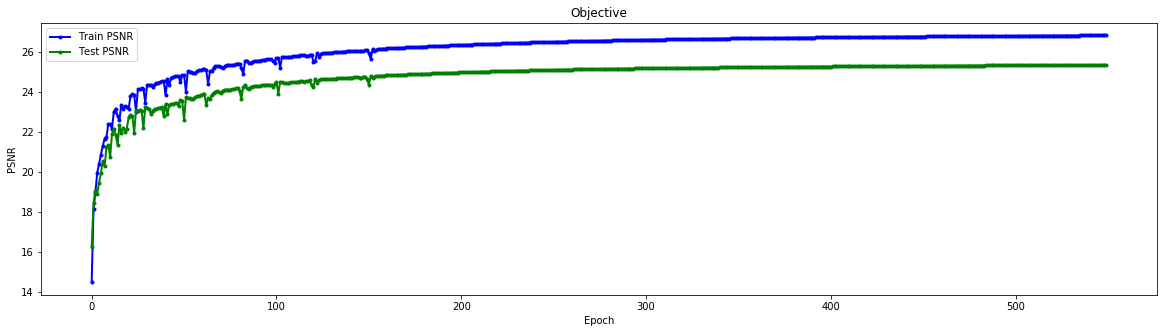

In [20]:
#print('all test psnr',record[2])
plt.plot(list(range(0,len(record[1]))),record[1],'bo-', linewidth=2, markersize=3,label='Train PSNR')
plt.plot(list(range(0,len(record[2]))),record[2],'go-', linewidth=2, markersize=3,label='Test PSNR')
plt.legend()
plt.title('Objective')
plt.xlabel('Epoch')
plt.ylabel('PSNR')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [23]:
# fixed for colored image just for simplification
import numpy as np
import cv2
import PIL
from sklearn.metrics import mean_squared_error
val_images, val_ground_images = data_set['val',1:]
val_images = val_images.astype(np.float32)/255
val_ground_images = val_ground_images.astype(np.float32)/255
mse = 0
mse_nearest = 0
mse_low_resolution = 0
for ii,img in enumerate(val_ground_images):
    #downsample the ground truth directly
    img_down = cv2.resize(img,(0,0),fx=data_set.resize,fy=data_set.resize, interpolation=PIL.Image.BICUBIC)
    #the shape is (y,x) while cv2.resize requires (x,y)
    img_recover = cv2.resize(img_down,(img.shape[1],img.shape[0]),interpolation=PIL.Image.BICUBIC)
    img_recover_nearest = cv2.resize(img_down,(img.shape[1],img.shape[0]),interpolation=PIL.Image.NEAREST)
    mse_local = 0
    mse_low_resolution_local = 0
    mse_nearest_local = 0
    for channel in range(img.shape[2]):
        mse_local += mean_squared_error(img[:,:,channel],img_recover[:,:,channel])
        mse_low_resolution_local += mean_squared_error(img[:,:,channel],val_images[ii,:,:,channel])
        mse_nearest_local += mean_squared_error(img[:,:,channel],img_recover_nearest[:,:,channel])
    mse_local/=img.shape[2]
    mse_low_resolution_local /= img.shape[2]
    mse_nearest_local /= img.shape[2]
    
    mse_nearest+= mse_nearest_local
    mse += mse_local
    mse_low_resolution += mse_low_resolution_local
mse = mse/data_set.size('val')
mse_low_resolution = mse_low_resolution/data_set.size('val')
mse_nearest = mse_nearest/data_set.size('val')
psnr_low_resolution = 10*np.log10(1/mse_low_resolution)
psnr_baseline = 10*np.log10(1/mse)
psnr_nearest = 10*np.log10(1/mse_nearest)



In [24]:
#print results
print("PSNR of the low resolution image (Raw Data) to the ground truth",psnr_low_resolution,"db")
print("PSNR of Nearest Interpolation",psnr_nearest,"| Improvement",psnr_nearest-psnr_low_resolution)
print("PSNR of Bicubic Interpolation",psnr_baseline, "| Improvement",psnr_baseline-psnr_low_resolution)
print("PSNR of SRCNN",record[0], "| Improvement",record[0]-psnr_low_resolution)

PSNR of the low resolution image (Raw Data) to the ground truth 25.066627626705888 db
PSNR of Nearest Interpolation 26.15393354751909 | Improvement 1.087305920813204
PSNR of Bicubic Interpolation 26.15393354751909 | Improvement 1.087305920813204
PSNR of SRCNN 25.340584382273622 | Improvement 0.2739567555677347


## Analysis
As expected, the validation objective is slightly worse than that of the training, indicating a good fit. The rate of improving on the PSNR is diminishing over the epochs, but is not yet terminated.

The trend of the objective (both train and validation) hasn't reached the optimum yet after 550 epochs. The improvement is worse than that of the bicubic, but it must be noted that the dataset in the original paper is roughly 30 times larger and the hyperparameters was fine-tuned. We do not have more resources to finish the training and tuning, but so far the progress indicates improvement of PSNR and is converging and the results could be more promising with more data and training time, or more delicated network structures.

In [31]:
#visualization - the mockup code is from ..
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

checkpoint_path = 'saved_model/best_model_by_epoch'

image = (data.astronaut())

image_rescaled = rescale(image, 1.0 / 4.0, anti_aliasing=False)
print(image_rescaled.shape)
model  = build_model(128,128,3)['cnn']
model.load_weights(checkpoint_path)
output = model.evaluate(image_rescaled)
plt.imshow(output)

/usr/local/lib/python3.6/site-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
/usr/local/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(128, 128, 3)


AttributeError: 'Tensor' object has no attribute 'load_weights'